---
<h1 align="center"> PatchTST Architecture</h1>

---

PatchTST is a new Transformer architecture that incorporates two key concepts for time series forecasting: channel independence and patching.
Channel independence involves decomposing multichannel sequences into single channels before input to the model, allowing for handling different types of data.
Patching divides the input sequence into smaller parts, or patches "window", allowing the model to focus on similar group of data.
PatchTST is evaluated the effectiveness of the model on multichannel time series forecasting tasks where both the input and output data are multichannel.* PatchTST is a new Transformer architecture that incorporates two key concepts for time series forecasting: channel independence and patching.
* Channel independence involves decomposing multichannel sequences into single channels before input to the model, allowing for handling different types of data. 
* Patching divides the input sequence into smaller parts, or patches "window", allowing the model to focus on similar group of data.
* PatchTST is evaluated the effectiveness of the model on multichannel time series forecasting tasks where both the input and output data are multichannel.

<img width="1000" src="Images/PatchTST.png" alt="PatchTST Archticture" align="center" />

---
## Inputs and Outputs
---
##### **Input sequence:**
* The input to the PatchTST algorithm is a time series data that can have multiple channels (features). The multichannel input is decomposed into single channels using the channel independence concept, then PatchTST model applies patching to divide the input sequence into smaller parts or patches, allowing the model to focus on local patterns while avoiding memory constraints and facilitating quicker inference.

* The length of the input sequence is defined by the `seq_len` hyperparameter.


##### **Output sequence:**
* The output of the PatchTST model is a sequence of multichannel time series of predicted values, where each value corresponds to a prediction made at a specific time step in the output sequence.

* The length of the output sequence is defined by the `pred_len` hyperparameter.

---
## Methodology
---

- This notebook provide a step-by-step guide for replicating the **PatchTST** model and training it on the ETDataset (ETTh1, ETTh2, ETTm1, and ETTm2), ensuring accurate reproduction of the models by comparing the notebook results with the official paper results. The main foucs here is to study the *impact of a number of prediction length and the number of input patches on the performance*. The workflow from the beginning to forcasting is as follows:


### 1. Data Preparation: 
* The author preprocessed the ETT dataset by normalizing the input features and splitting the data into training, validation, and test sets.

### 2. Replicate Model Architecture: 
* Using the PatchTST architecture with channel independence and patching. Then reconstructing the PatchTST model to output a single-channel sequence instead of a multichannel sequence.

### 3. Training: 
* Training the PatchTST model on the training set and validated it on the validation set. We used the Mean Absolute Percentage Error (MAPE) as the evaluation metric.

### 4. Hyperparameter Tuning: 
* Tune the hyperparameters of the PatchTST model using a grid search approach. We experimented with different values for the number of layers, the number of heads, the patch length, and the stride.

### 5. Testing: 
* Evaluating the performance of the PatchTST model on the test set and compared it to the performance of simple DNN models.

### 6. Results: 
* We will apply the PatchTST model on ETT datasets with different number of patches and prediction lenght according to the trials In the original PatchTST paper and compare the results.


---
## Hyperparameters
---

**Here are the hyperparameters that control the input and output of PatchTST:**

| Parameter | Description | Value |
|---|---|---|
| `args.data` | The name of the dataset to use. | 'ETTh1', 'ETTh2', 'ETTm1', and 'ETTm2'|
| `args.root_path` | The root path of the data file. | `./Datasets/` |
| `args.features` | The type of forecasting task to perform. The options are 'M' (multivariate predict multivariate), 'S' (univariate predict univariate), and 'MS' (multivariate predict univariate). | 'M'|
| `args.target` | The target feature to predict in a univariate or multivariate task. ('HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT')| 'OT' |
| `args.seq_len` | The length of the input sequence to the Informer encoder. | 336|
| `args.pred_len` | The length of the future sequence to be predicted. | [96, 192, 336, 720]|
| `args.patch_len` | The size of each patch | 24 |
| `args.num_patch` | The number of input patches| [42, 64]  |
| `args.stride` | The step size used to slide the patch window across the input time series data during the patching process | 8|
| `args.batch_size` |  The size of one batch in training | 128 |
| `args.learning_rate` | Learning rate  | 0.0001 |
| `args.patience` | The number of epochs to wait before early stopping | 10 |
| `args.train_epochs` | Number of epochs in train | 20 |
| `args.padding` | The amount of padding to add to the input sequence, if any. | 0|
| `args.freq` |  freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h | 'h' |
| `args.embed` | The type of time feature encoding to use. The options are 'timeF' (time features encoding), 'fixed' (fixed positional encoding), and 'learned' (learned positional encoding). | 'timeF' |

---------
- **ProbSparse Attention:** 

| Parameter | Description | Value |
|---|---|---|
| `args.attn` | The type of attention used in the encoder. The options are 'prob' (probabilistic sparse attention) and 'full' (full attention). | 'prob' |
| `args.n_heads` | The number of attention heads in the encoder. | 16 |
| `args.factor` | The ProbSparse attention factor. A higher value of factor results in a sparser attention matrix. | 5 |
| `args.dropout` | The dropout probability applied to the attention weights. | 0.1 |
| `args.d_model` | The dimension of the model. | 512 |

---
- **Feedforward Network:** 

| Parameter | Description | Value |
|---|---|---|
| `args.d_ff` | The dimension of the feedforward network. | 2048 |
| `args.activation` | The activation function used in the feedforward network. | 'gelu' |
| `args.dropout` | The dropout probability applied to the attention weights. | 0.1 |

---
- **Mixing Layer:**

The model includes a mixing layer that linearly combines the outputs of the attention heads in the encoder and decoder, which helps to improve the model's performance. Here are the hyperparameters that control the mixing layer:

| Parameter | Description | Value |
|---|---|---|
| `args.mix` | Whether to apply a linear projection to the concatenated outputs of the attention heads. | True |
| `args.d_model` | The dimension of the model. | 512 |

---
**The following are the experiment Hyperparameters.**


| Parameter | Description | Value |
|---|---|---|
| `args.output_attention` | Whether to output attention in ecoder | False |
| `args.use_amp` | Whether to use automatic mixed precision training | False |
| `args.train_only` | Whether to train the model or fine-tune | True |
| `args.train_epochs` | The number of epochs to train for. | 8 |
| `args.batch_size` | The batch size of training input data. | 32 |
| `args.learning_rate` | Learning rate starts from 1e−4, decaying two times smaller every epoch. | 0.0001 |
| `args.lradj` | Learning rate decayed two times smaller every epoch. | 'type1' |
| `args.loss` | Evaluating criteria | `'mse'` |
| `args.patience` | The number of epochs to wait before early stopping. | 3 |
| `args.des` | The description of the experiment. | 'test' |
| `args.itr` | The iteration of the experiment. | 1 |
| `args.model` | The model name | 'informer' |
| `args.checkpoints` | Location of model checkpoints | `'./Checkpoints/Informer_checkpoints'` |


---
# Setup
---

**Add project_files to system path**

In [3]:
!git clone https://github.com/debi2023-group3/Transformer-based-solutions-for-the-long-term-time-series-forecasting.git

Cloning into 'Transformer-based-solutions-for-the-long-term-time-series-forecasting'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 202 (delta 81), reused 168 (delta 47), pack-reused 0
Receiving objects: 100% (202/202), 35.84 MiB | 23.01 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [4]:
import os
os.chdir('/kaggle/working/Transformer-based-solutions-for-the-long-term-time-series-forecasting')

In [5]:
import sys
if not 'Transformer-based-solutions-for-the-long-term-time-series-forecasting' in sys.path:
    sys.path += ['Transformer-based-solutions-for-the-long-term-time-series-forecasting']
    
sys.path

['/kaggle/working',
 '/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/opt/conda/lib/python310.zip',
 '/opt/conda/lib/python3.10',
 '/opt/conda/lib/python3.10/lib-dynload',
 '',
 '/root/.local/lib/python3.10/site-packages',
 '/opt/conda/lib/python3.10/site-packages',
 '/src/bq-helper',
 'Transformer-based-solutions-for-the-long-term-time-series-forecasting']

**Important library**

In [6]:
import torch
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os
from exp.exp_PatchTST import Exp_Main #, Dataset_Pred

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

---
# Working on ETT Dataset


* The Electricity Transformer Temperature (ETT) is a crucial indicator in the electric power long-term deployment. This dataset consists of 2 years data from two separated counties in .There are different subsets, {ETTh1, ETTh2} for 1-hour-level and ETTm1 for 15-minutes-level. Each data point consists of the target value ”oil temperature” and 6 power load features. The train/val/test is 12/4/4 months.

---
# Working on ETTh1 Dataset
---

## Trail 1: PatchTST/42, Dataset:ETTh1,  Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [8]:
"""
    **dotdict function**
    This function is used to convert a dictionary into
    an object whose keys can be accessed as attributes
"""

args = dotdict()

args.model = 'PatchTST'   # Model Name
args.random_seed = 2021
args.is_training = 1
args.model_id = f"{args.data}_{args.seq_len}_{args.pred_len}"
args.fc_dropout = 0.3
args.head_dropout = 0
args.patch_len = 16 # The size of each patch
args.num_patch = 42  # The number of input patches (42 64)  
args.stride = 8 # The step size used to slide the patch window across the input time series data during the patching process.
args.batch_size = 128 # The size of one batch in training
args.learning_rate = 0.0001 # Learning rate
args.pred_len = 96 # prediction sequence length   (96, 192, 336, 720)  
args.patience = 3  # The number of epochs to wait before early stopping.
args.train_epochs = 20   # Number of epochs in train


args.use_multi_gpu = False 
args.use_gpu = True if torch.cuda.is_available() else False # Using GPU if cuda is available 
# args.learning_rate = 0.005 
args.label_len = 48 # start token length of PatchTST decoder
args.use_amp = False # whether to use automatic mixed precision training
args.output_attention = False # whether to output attention in ecoder
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.train_only=True
args.checkpoints = './Checkpoints/PatchTST_checkpoints' # location of model checkpoints


args.data = 'ETTh1'  # data
args.root_path = './Datasets/' # root path of data file
args.data_path = 'ETTh1.csv' # data file
args.target = 'OT' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.seq_len = 336 # input sequence length of PatchTST encoder

# PatchTST decoder input: concat[start token series(label_len), zero padding series(pred_len)]
args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 16 # dimension of model
args.n_heads = 4 # num of heads
args.e_layers = 3 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 128   # dimension of fcn in model
args.dropout =0.3# 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.mix = True
args.padding = 0
args.loss = 'mse'   # evaluating criteria
args.lradj = 'TST'  # learning rate decayed two times smaller every epoch.
args.num_workers = 0
args.itr = 1
args.des = "Exp"   # The description of the experiment.
args.gpu = 0
args.devices = '0,1,2,3'

In [9]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False
if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]
    
print("Hyperparameter Combination of Trail 1: ") 
print(args)

Hyperparameter Combination of Trail 1: 
{'model': 'PatchTST', 'random_seed': 2021, 'is_training': 1, 'model_id': 'None_None_None', 'fc_dropout': 0.3, 'head_dropout': 0, 'patch_len': 48, 'num_patch': 42, 'stride': 8, 'batch_size': 128, 'learning_rate': 0.0001, 'pred_len': 96, 'patience': 3, 'train_epochs': 20, 'use_multi_gpu': False, 'use_gpu': True, 'label_len': 48, 'use_amp': False, 'output_attention': False, 'features': 'M', 'train_only': True, 'checkpoints': './Checkpoints/PatchTST_checkpoints', 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'target': 'OT', 'freq': 'h', 'seq_len': 336, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 16, 'n_heads': 4, 'e_layers': 3, 'd_layers': 1, 'd_ff': 128, 'dropout': 0.3, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'mix': True, 'padding': 0, 'loss': 'mse', 'lradj': 'type1', 'num_workers': 0, 'itr': 1, 'des': 'Exp', 'gpu': 0, 'devices': '0,1,2,3'}


### Training

In [23]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
val 2785
test 2785
Epoch: 1 cost time: 1.562014102935791
Epoch: 1, Steps: 64 | Train Loss: 1.2747858 Vali Loss: 1.5947151 Test Loss: 1.1714827
>>> Validation loss decreased (inf --> 1.594715).  Saving model ...
Updating learning rate to 1.0463629820836433e-05
Epoch: 2 cost time: 1.4674444198608398
Epoch: 2, Steps: 64 | Train Loss: 1.0756977 Vali Loss: 1.3648134 Test Loss: 0.8922732
>>> Validation loss decreased (1.594715 --> 1.364813).  Saving model ...
Updating learning rate to 2.8113748014145436e-05
Epoch: 3 cost time: 1.468324899673462
Epoch: 3, Steps: 64 | Train Loss: 0.7791519 Vali Loss: 1.1771934 Test Loss: 0.6427280
>>> Validation loss decreased (1.364813 --> 1.177193).  Saving model ...
Updating learning rate to 5.219686165094539e-05
Epoch: 4 cost time: 1.4713139533996582
Epoch: 4, Steps: 64 | Train Loss: 0.6247603 Vali Loss: 0.9767678 Test Loss: 0.5367808
>>> Validation loss decreased (1.177193 --> 0.976768).  Saving model ...
Updating learning rate 

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2785
mae:0.4255010187625885, mse:0.4063381254673004, rmse:0.6374465823173523, mape:8.492924690246582, mspe:30706.875


<Figure size 1500x500 with 0 Axes>

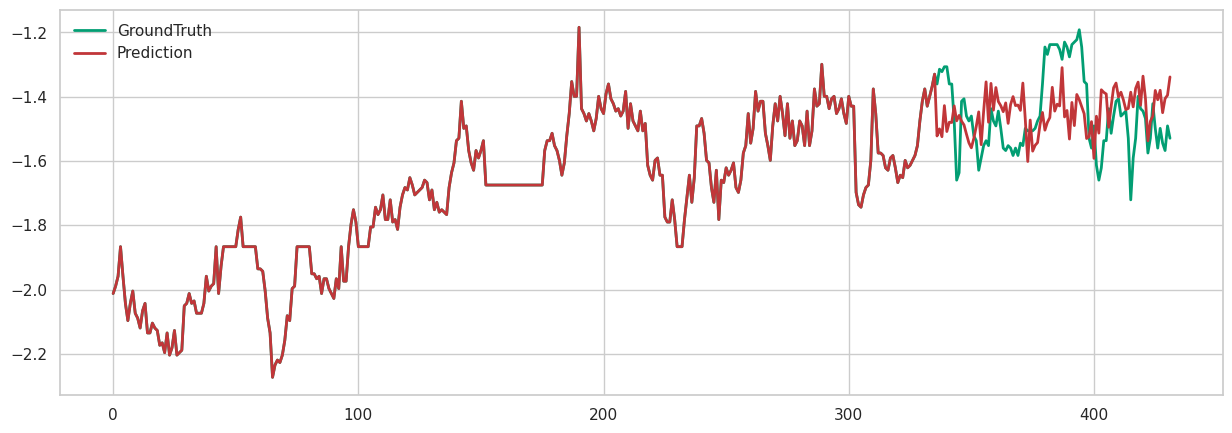

In [24]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: PatchTST/64, Dataset:ETTh1 , Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [25]:
args.pred_len = 96 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh1, Prediction Length: 96, Number of Patches: 64


### Training

In [26]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
val 2785
test 2785
Epoch: 1 cost time: 1.5365822315216064
Epoch: 1, Steps: 64 | Train Loss: 1.3238390 Vali Loss: 1.6421866 Test Loss: 1.2205502
>>> Validation loss decreased (inf --> 1.642187).  Saving model ...
Updating learning rate to 1.0463629820836433e-05
Epoch: 2 cost time: 1.4842596054077148
Epoch: 2, Steps: 64 | Train Loss: 1.0862102 Vali Loss: 1.3650184 Test Loss: 0.8902066
>>> Validation loss decreased (1.642187 --> 1.365018).  Saving model ...
Updating learning rate to 2.8113748014145436e-05
Epoch: 3 cost time: 1.5300233364105225
Epoch: 3, Steps: 64 | Train Loss: 0.7572246 Vali Loss: 1.1816428 Test Loss: 0.6321608
>>> Validation loss decreased (1.365018 --> 1.181643).  Saving model ...
Updating learning rate to 5.219686165094539e-05
Epoch: 4 cost time: 1.4907000064849854
Epoch: 4, Steps: 64 | Train Loss: 0.6066177 Vali Loss: 1.0101117 Test Loss: 0.5316591
>>> Validation loss decreased (1.181643 --> 1.010112).  Saving model ...
Updating learning rat

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2785
mae:0.4248977601528168, mse:0.405911386013031, rmse:0.6371117234230042, mape:8.615785598754883, mspe:31763.419921875


<Figure size 1500x500 with 0 Axes>

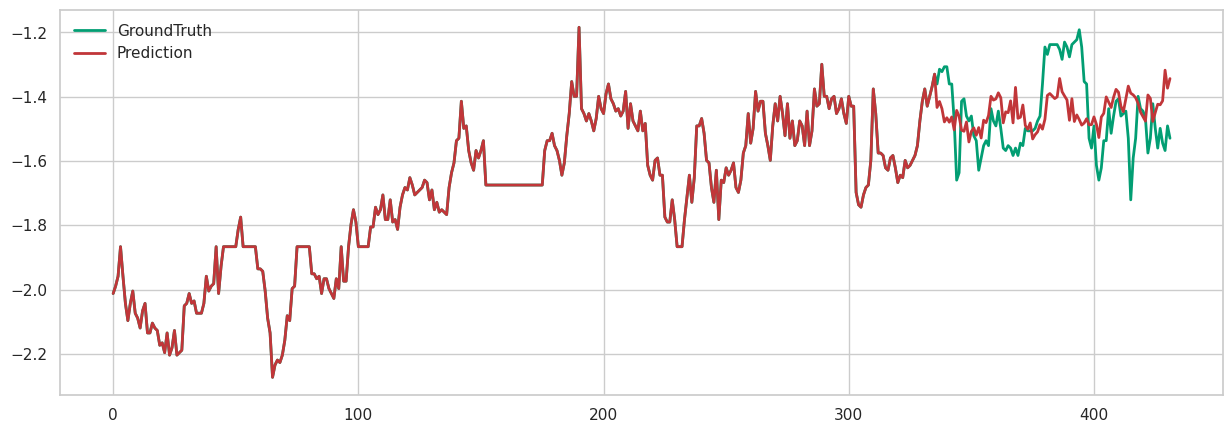

In [27]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: PatchTST/42, Dataset:ETTh1 , Metric: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [33]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh1, Prediction Length: 192, Number of Patches: 42


### Training

In [34]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
val 2689
test 2689
Epoch: 1 cost time: 1.536823034286499
Epoch: 1, Steps: 63 | Train Loss: 1.2846676 Vali Loss: 1.6807282 Test Loss: 1.1942233
>>> Validation loss decreased (inf --> 1.680728).  Saving model ...
Updating learning rate to 1.0464153247552845e-05
Epoch: 2 cost time: 1.4526827335357666
Epoch: 2, Steps: 63 | Train Loss: 1.0930592 Vali Loss: 1.4895948 Test Loss: 0.9136199
>>> Validation loss decreased (1.680728 --> 1.489595).  Saving model ...
Updating learning rate to 2.8115559773217685e-05
Epoch: 3 cost time: 1.4560625553131104
Epoch: 3, Steps: 63 | Train Loss: 0.8087183 Vali Loss: 1.3264709 Test Loss: 0.6713511
>>> Validation loss decreased (1.489595 --> 1.326471).  Saving model ...
Updating learning rate to 5.2199994709629883e-05
Epoch: 4 cost time: 1.456709623336792
Epoch: 4, Steps: 63 | Train Loss: 0.6576499 Vali Loss: 1.1601706 Test Loss: 0.5786478
>>> Validation loss decreased (1.326471 --> 1.160171).  Saving model ...
Updating learning rate

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2689
mae:0.4492419362068176, mse:0.44610926508903503, rmse:0.667914092540741, mape:8.977039337158203, mspe:31453.638671875


<Figure size 1500x500 with 0 Axes>

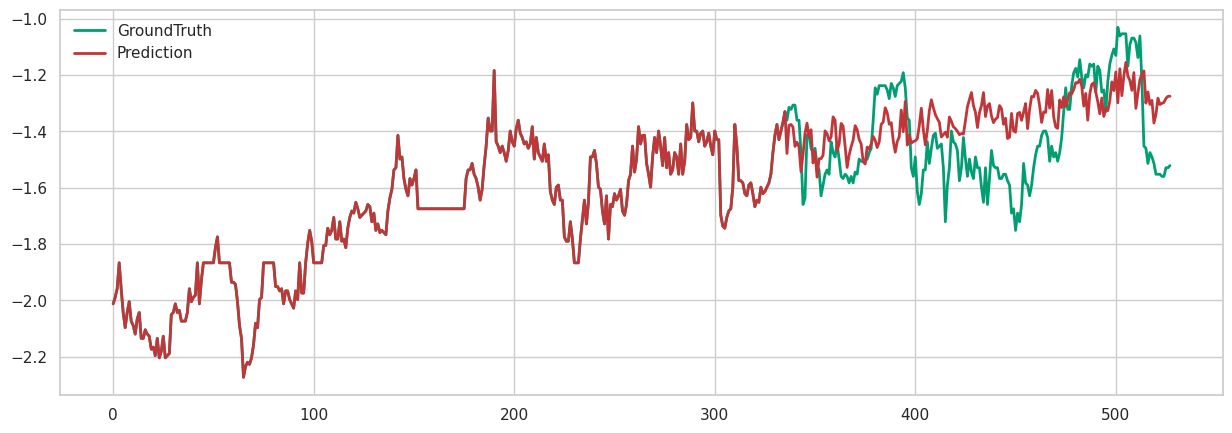

In [35]:
exp.test(setting)
torch.cuda.empty_cache()

## Trail 4: PatchTST/64, Dataset:ETTh1, Metric: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [41]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh1, Prediction Length: 192, Number of Patches: 64


### Training

In [38]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
val 2689
test 2689
Epoch: 1 cost time: 1.5297293663024902
Epoch: 1, Steps: 63 | Train Loss: 1.2701621 Vali Loss: 1.6576529 Test Loss: 1.1475819
>>> Validation loss decreased (inf --> 1.657653).  Saving model ...
Updating learning rate to 1.0464153247552845e-05
Epoch: 2 cost time: 1.4695608615875244
Epoch: 2, Steps: 63 | Train Loss: 1.0456762 Vali Loss: 1.4950056 Test Loss: 0.8574990
>>> Validation loss decreased (1.657653 --> 1.495006).  Saving model ...
Updating learning rate to 2.8115559773217685e-05
Epoch: 3 cost time: 1.4701783657073975
Epoch: 3, Steps: 63 | Train Loss: 0.7783584 Vali Loss: 1.3914849 Test Loss: 0.6813632
>>> Validation loss decreased (1.495006 --> 1.391485).  Saving model ...
Updating learning rate to 5.2199994709629883e-05
Epoch: 4 cost time: 1.5123624801635742
Epoch: 4, Steps: 63 | Train Loss: 0.6592824 Vali Loss: 1.2291828 Test Loss: 0.5995246
>>> Validation loss decreased (1.391485 --> 1.229183).  Saving model ...
Updating learning ra

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2689
mae:0.4518069922924042, mse:0.45057564973831177, rmse:0.6712493300437927, mape:8.644227027893066, mspe:28608.56640625


<Figure size 1500x500 with 0 Axes>

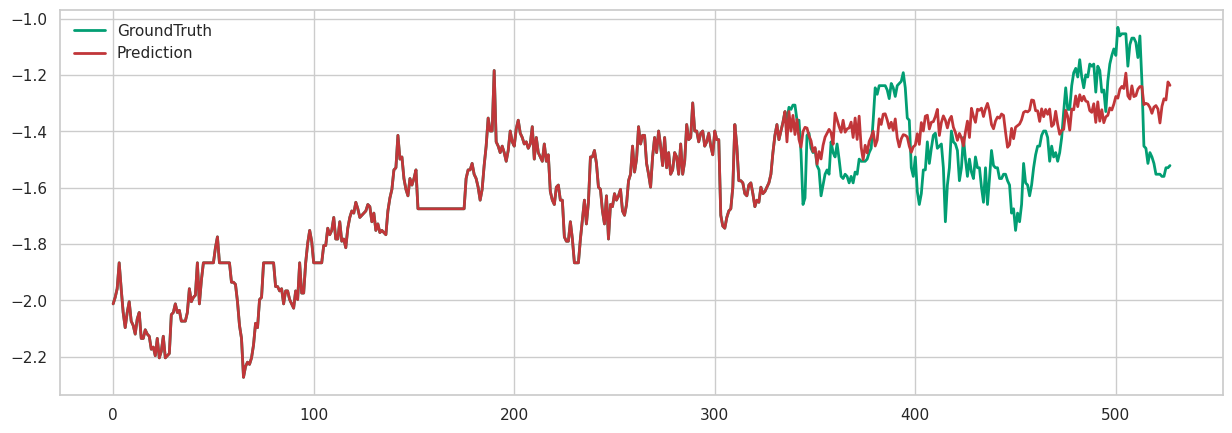

In [39]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 5: PatchTST/42, Dataset:ETTh1,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [48]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh1, Prediction Length: 336, Number of Patches: 42


### Training

In [49]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
val 2545
test 2545
Epoch: 1 cost time: 1.5439891815185547
Epoch: 1, Steps: 62 | Train Loss: 1.2556116 Vali Loss: 1.6906328 Test Loss: 1.1467867
>>> Validation loss decreased (inf --> 1.690633).  Saving model ...
Updating learning rate to 1.0464693625140384e-05
Epoch: 2 cost time: 1.4746110439300537
Epoch: 2, Steps: 62 | Train Loss: 1.0748948 Vali Loss: 1.5413135 Test Loss: 0.8712221
>>> Validation loss decreased (1.690633 --> 1.541314).  Saving model ...
Updating learning rate to 2.811743018110611e-05
Epoch: 3 cost time: 1.475860595703125
Epoch: 3, Steps: 62 | Train Loss: 0.8176517 Vali Loss: 1.4089683 Test Loss: 0.6345149
>>> Validation loss decreased (1.541314 --> 1.408968).  Saving model ...
Updating learning rate to 5.220322910624572e-05
Epoch: 4 cost time: 1.51478910446167
Epoch: 4, Steps: 62 | Train Loss: 0.6799195 Vali Loss: 1.2659166 Test Loss: 0.5513946
>>> Validation loss decreased (1.408968 --> 1.265917).  Saving model ...
Updating learning rate to

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2545
mae:0.46413514018058777, mse:0.4610714912414551, rmse:0.6790224313735962, mape:8.29255485534668, mspe:27259.8984375


<Figure size 1500x500 with 0 Axes>

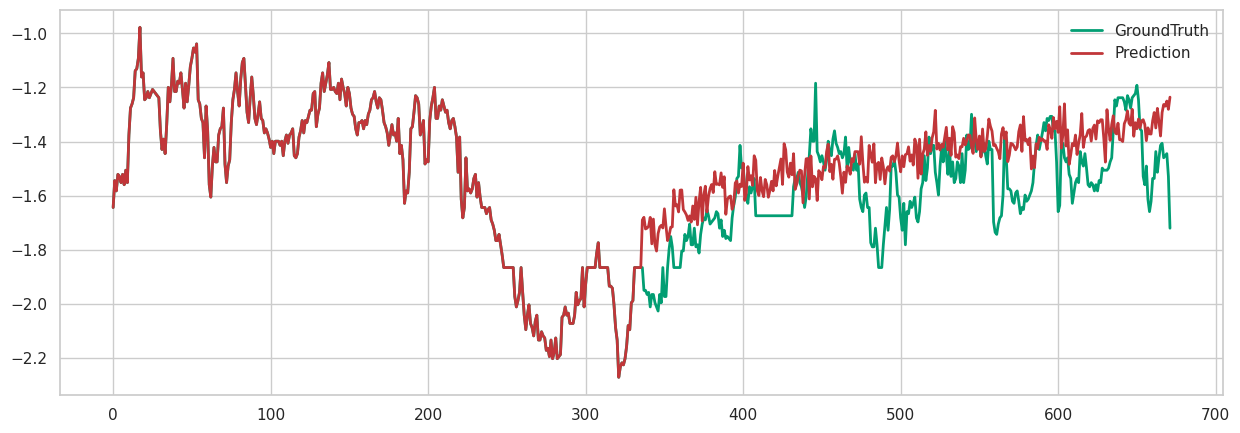

In [50]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 6: PatchTST/64, Dataset:ETTh1,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [52]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 

Dataset: ETTh1, Prediction Length: 336, Number of Patches: 64


### Training

In [53]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
val 2545
test 2545
Epoch: 1 cost time: 1.593506097793579
Epoch: 1, Steps: 62 | Train Loss: 1.2755169 Vali Loss: 1.6992784 Test Loss: 1.1618999
>>> Validation loss decreased (inf --> 1.699278).  Saving model ...
Updating learning rate to 1.0464693625140384e-05
Epoch: 2 cost time: 1.4692602157592773
Epoch: 2, Steps: 62 | Train Loss: 1.1009677 Vali Loss: 1.5407672 Test Loss: 0.8865129
>>> Validation loss decreased (1.699278 --> 1.540767).  Saving model ...
Updating learning rate to 2.811743018110611e-05
Epoch: 3 cost time: 1.4726495742797852
Epoch: 3, Steps: 62 | Train Loss: 0.8306515 Vali Loss: 1.4132499 Test Loss: 0.6346869
>>> Validation loss decreased (1.540767 --> 1.413250).  Saving model ...
Updating learning rate to 5.220322910624572e-05
Epoch: 4 cost time: 1.4708611965179443
Epoch: 4, Steps: 62 | Train Loss: 0.6847181 Vali Loss: 1.2632575 Test Loss: 0.5510373
>>> Validation loss decreased (1.413250 --> 1.263258).  Saving model ...
Updating learning rate 

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2545
mae:0.47884368896484375, mse:0.4796646535396576, rmse:0.6925782561302185, mape:8.280799865722656, mspe:26338.435546875


<Figure size 1500x500 with 0 Axes>

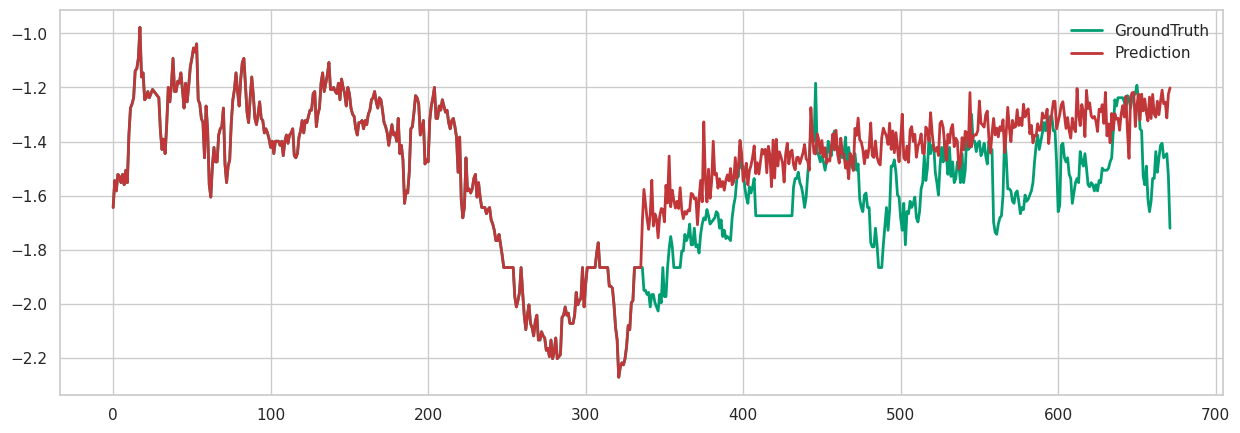

In [54]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 7: PatchTST/42, Dataset:ETTh1, Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [55]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh1, Prediction Length: 720, Number of Patches: 42


### Training

In [56]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
val 2161
test 2161
Epoch: 1 cost time: 1.6527421474456787
Epoch: 1, Steps: 59 | Train Loss: 1.2621660 Vali Loss: 1.7844108 Test Loss: 1.1337408
>>> Validation loss decreased (inf --> 1.784411).  Saving model ...
Updating learning rate to 1.0466425117684725e-05
Epoch: 2 cost time: 1.5013563632965088
Epoch: 2, Steps: 59 | Train Loss: 1.1079497 Vali Loss: 1.7005076 Test Loss: 0.9010948
>>> Validation loss decreased (1.784411 --> 1.700508).  Saving model ...
Updating learning rate to 2.812342322896289e-05
Epoch: 3 cost time: 1.4712414741516113
Epoch: 3, Steps: 59 | Train Loss: 0.8928486 Vali Loss: 1.6042616 Test Loss: 0.7030876
>>> Validation loss decreased (1.700508 --> 1.604262).  Saving model ...
Updating learning rate to 5.221359199676445e-05
Epoch: 4 cost time: 1.5481727123260498
Epoch: 4, Steps: 59 | Train Loss: 0.7646307 Vali Loss: 1.4395130 Test Loss: 0.6068778
>>> Validation loss decreased (1.604262 --> 1.439513).  Saving model ...
Updating learning rate

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2161
mae:0.5141763687133789, mse:0.5100709199905396, rmse:0.7141925096511841, mape:9.060659408569336, mspe:29205.203125


<Figure size 1500x500 with 0 Axes>

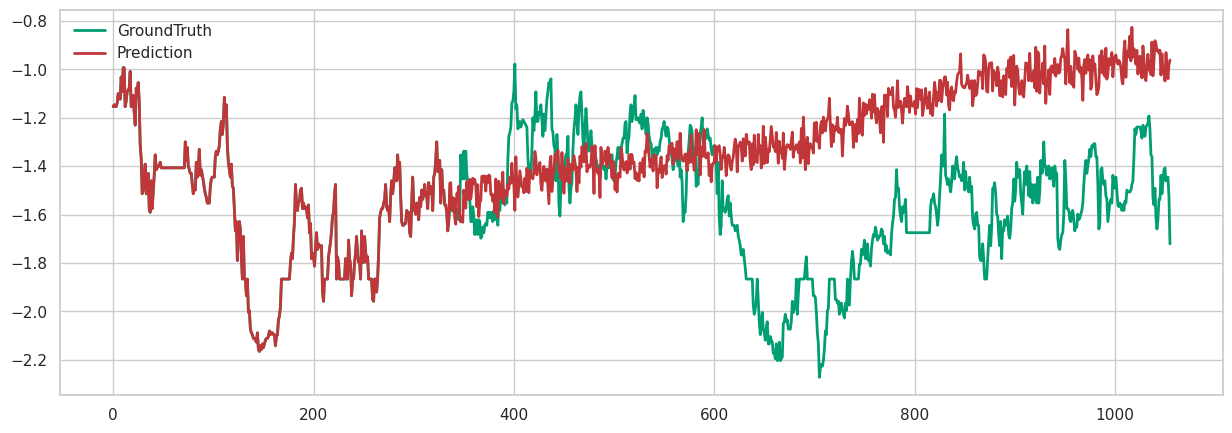

In [57]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 8: PatchTST/64, Dataset:ETTh1, Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [58]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh1, Prediction Length: 336, Number of Patches: 64


### Training

In [59]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
val 2545
test 2545
Epoch: 1 cost time: 1.5479843616485596
Epoch: 1, Steps: 62 | Train Loss: 1.2884903 Vali Loss: 1.7234567 Test Loss: 1.1734147
>>> Validation loss decreased (inf --> 1.723457).  Saving model ...
Updating learning rate to 1.0464693625140384e-05
Epoch: 2 cost time: 1.4928996562957764
Epoch: 2, Steps: 62 | Train Loss: 1.1105514 Vali Loss: 1.5721521 Test Loss: 0.9079838
>>> Validation loss decreased (1.723457 --> 1.572152).  Saving model ...
Updating learning rate to 2.811743018110611e-05
Epoch: 3 cost time: 1.4918253421783447
Epoch: 3, Steps: 62 | Train Loss: 0.8479307 Vali Loss: 1.4590845 Test Loss: 0.6611597
>>> Validation loss decreased (1.572152 --> 1.459085).  Saving model ...
Updating learning rate to 5.220322910624572e-05
Epoch: 4 cost time: 1.493762731552124
Epoch: 4, Steps: 62 | Train Loss: 0.7064504 Vali Loss: 1.2875961 Test Loss: 0.5624734
>>> Validation loss decreased (1.459085 --> 1.287596).  Saving model ...
Updating learning rate 

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2545
mae:0.46555638313293457, mse:0.46172845363616943, rmse:0.6795060634613037, mape:8.157415390014648, mspe:26354.82421875


<Figure size 1500x500 with 0 Axes>

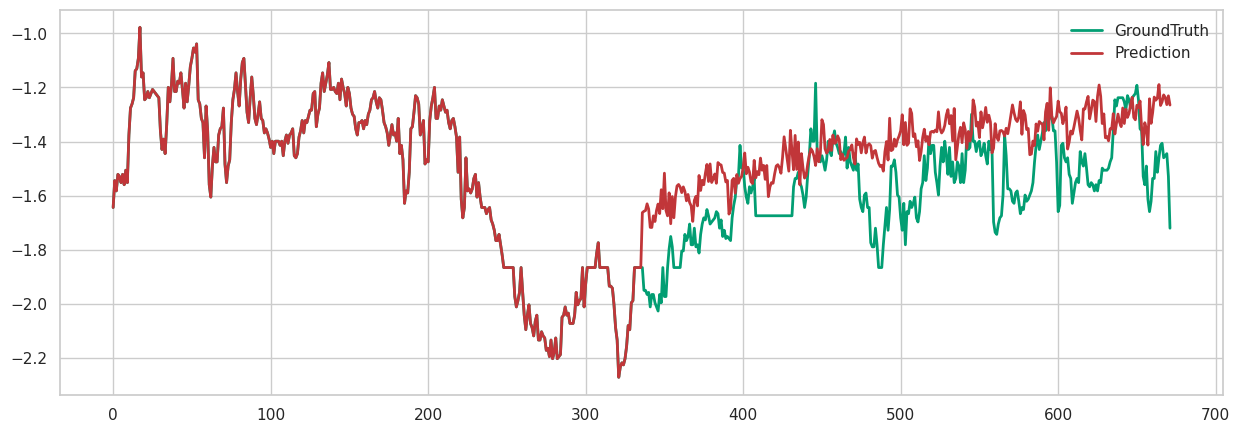

In [60]:
exp.test(setting)
torch.cuda.empty_cache()

### Compare our results with paper results

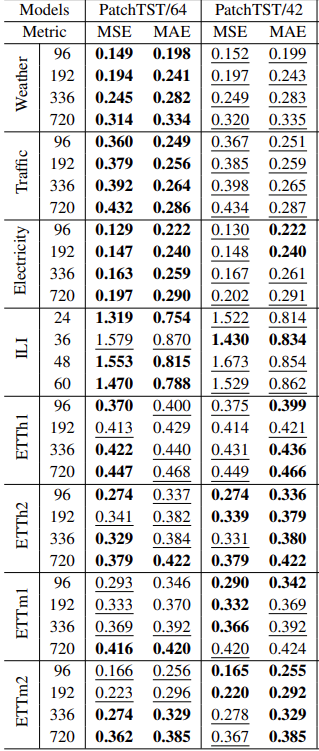

In [3]:
from IPython.display import Image
Image(filename=r"./Images/PatchTST Results.PNG")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| PatchTST/42 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTh1 | 96 |  0.4063381254673004 | 0.4255010187625885  |
|  | ETTh1 | 192 |  0.44610926508903503 | 0.4492419362068176 |
|  | ETTh1 | 336 | 0.4610714912414551 | 0.46413514018058777  |
|  | ETTh1 | 720 | 0.5100709199905396 | 0.5141763687133789 |


| PatchTST/64 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTh1 | 96 |  0.405911386013031 | 0.4248977601528168  |
|  | ETTh1 | 192 |  0.45057564973831177 | 0.4518069922924042 |
|  | ETTh1 | 336 | 0.4796646535396576 | 0.47884368896484375  |
|  | ETTh1 | 720 | 0.46172845363616943 | 0.46555638313293457 |

---
# Working on ETTh2 Dataset
---

## Trail 1: PatchTST/42, Dataset:ETTh2,  Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [72]:
args.data_path = 'ETTh2.csv' # data file
args.data = 'ETTh2'  # data
args.lradj = 'TST'
args.batch_size = 32
args.patch_len = 16
args.learning_rate = 0.0001
args.pred_len = 96 # prediction sequence length
args.num_patch = 42  # The number of input patches

print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 96, Number of Patches: 42


### Training

In [73]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
val 2785
test 2785
	iters: 100, epoch: 1 | loss: 0.9562707
	speed: 0.0130s/iter; left time: 65.2884s
	iters: 200, epoch: 1 | loss: 0.7431388
	speed: 0.0130s/iter; left time: 64.0533s
Epoch: 1 cost time: 3.32532000541687
Epoch: 1, Steps: 256 | Train Loss: 1.2123650 Vali Loss: 0.8348794 Test Loss: 1.4315829
>>> Validation loss decreased (inf --> 0.834879).  Saving model ...
Updating learning rate to 1.043896959721683e-05
	iters: 100, epoch: 2 | loss: 0.6649067
	speed: 0.0304s/iter; left time: 144.6929s
	iters: 200, epoch: 2 | loss: 0.8230971
	speed: 0.0134s/iter; left time: 62.4471s
Epoch: 2 cost time: 3.4309511184692383
Epoch: 2, Steps: 256 | Train Loss: 0.7974902 Vali Loss: 0.3604454 Test Loss: 0.4240959
>>> Validation loss decreased (0.834879 --> 0.360445).  Saving model ...
Updating learning rate to 2.8028364660788853e-05
	iters: 100, epoch: 3 | loss: 0.7280766
	speed: 0.0304s/iter; left time: 137.2111s
	iters: 200, epoch: 3 | loss: 0.6079919
	speed: 0.0132

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2785
mae:0.3576628863811493, mse:0.2993590533733368, rmse:0.5471371412277222, mape:1.3283672332763672, mspe:317.27471923828125


<Figure size 1500x500 with 0 Axes>

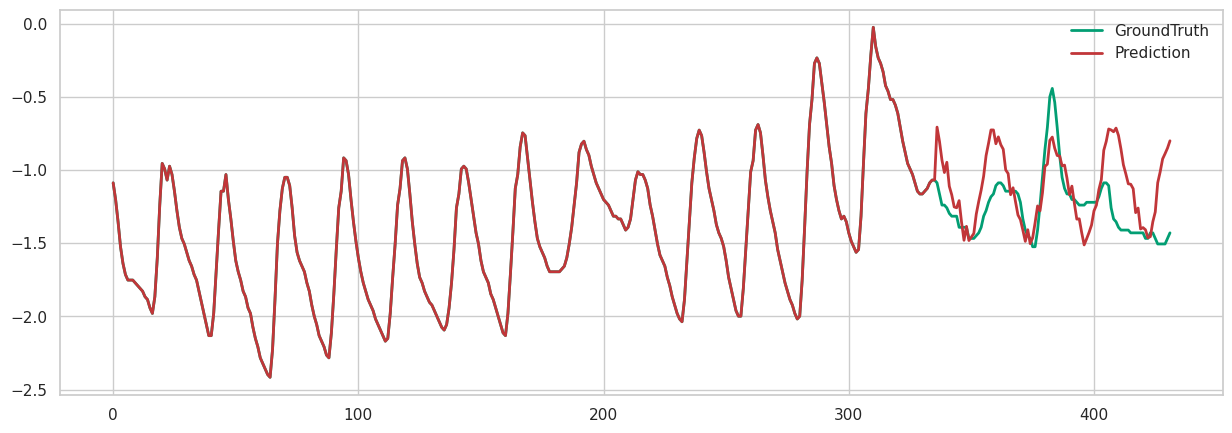

In [74]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: PatchTST/64, Dataset:ETTh2, Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [81]:
args.pred_len = 96 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 96, Number of Patches: 64


### Training

In [82]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
val 2785
test 2785
	iters: 100, epoch: 1 | loss: 0.8736709
	speed: 0.0130s/iter; left time: 65.2373s
	iters: 200, epoch: 1 | loss: 1.0262191
	speed: 0.0127s/iter; left time: 62.6192s
Epoch: 1 cost time: 3.292712450027466
Epoch: 1, Steps: 256 | Train Loss: 1.2016389 Vali Loss: 0.8268619 Test Loss: 1.4121580
>>> Validation loss decreased (inf --> 0.826862).  Saving model ...
Updating learning rate to 1.043896959721683e-05
	iters: 100, epoch: 2 | loss: 1.0652914
	speed: 0.0304s/iter; left time: 144.8900s
	iters: 200, epoch: 2 | loss: 1.0040795
	speed: 0.0128s/iter; left time: 59.8076s
Epoch: 2 cost time: 3.3594613075256348
Epoch: 2, Steps: 256 | Train Loss: 0.8085802 Vali Loss: 0.3548391 Test Loss: 0.4211553
>>> Validation loss decreased (0.826862 --> 0.354839).  Saving model ...
Updating learning rate to 2.8028364660788853e-05
	iters: 100, epoch: 3 | loss: 0.7958651
	speed: 0.0347s/iter; left time: 156.3009s
	iters: 200, epoch: 3 | loss: 0.7244552
	speed: 0.013

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2785
mae:0.35635489225387573, mse:0.29625624418258667, rmse:0.5442942380905151, mape:1.358083724975586, mspe:342.8503723144531


<Figure size 1500x500 with 0 Axes>

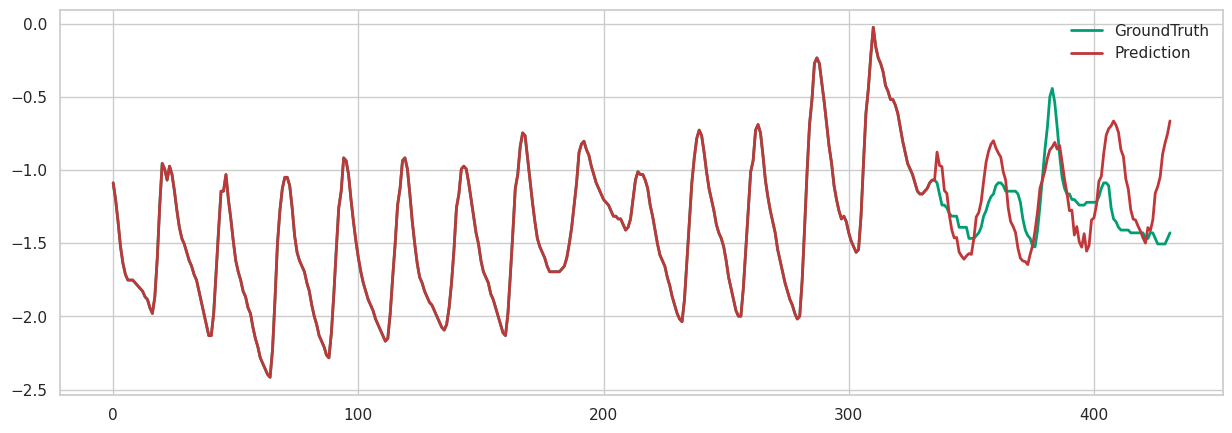

In [83]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: PatchTST/42, Dataset:ETTh2,  Metric: 192

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [90]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 192, Number of Patches: 42


### Training

In [91]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
val 2689
test 2689
	iters: 100, epoch: 1 | loss: 1.1573712
	speed: 0.0128s/iter; left time: 63.4064s
	iters: 200, epoch: 1 | loss: 1.1074313
	speed: 0.0127s/iter; left time: 61.7948s
Epoch: 1 cost time: 3.253159999847412
Epoch: 1, Steps: 253 | Train Loss: 1.1710346 Vali Loss: 0.8437940 Test Loss: 1.4646673
>>> Validation loss decreased (inf --> 0.843794).  Saving model ...
Updating learning rate to 1.043906679277449e-05
	iters: 100, epoch: 2 | loss: 0.9132248
	speed: 0.0294s/iter; left time: 138.3332s
	iters: 200, epoch: 2 | loss: 1.2035154
	speed: 0.0126s/iter; left time: 58.1597s
Epoch: 2 cost time: 3.304093599319458
Epoch: 2, Steps: 253 | Train Loss: 0.8487960 Vali Loss: 0.4340631 Test Loss: 0.5174038
>>> Validation loss decreased (0.843794 --> 0.434063).  Saving model ...
Updating learning rate to 2.8028701289355807e-05
	iters: 100, epoch: 3 | loss: 0.7275622
	speed: 0.0349s/iter; left time: 155.6636s
	iters: 200, epoch: 3 | loss: 0.6691213
	speed: 0.0130

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2689
mae:0.42008212208747864, mse:0.39204034209251404, rmse:0.6261312365531921, mape:1.4473258256912231, mspe:311.86663818359375


<Figure size 1500x500 with 0 Axes>

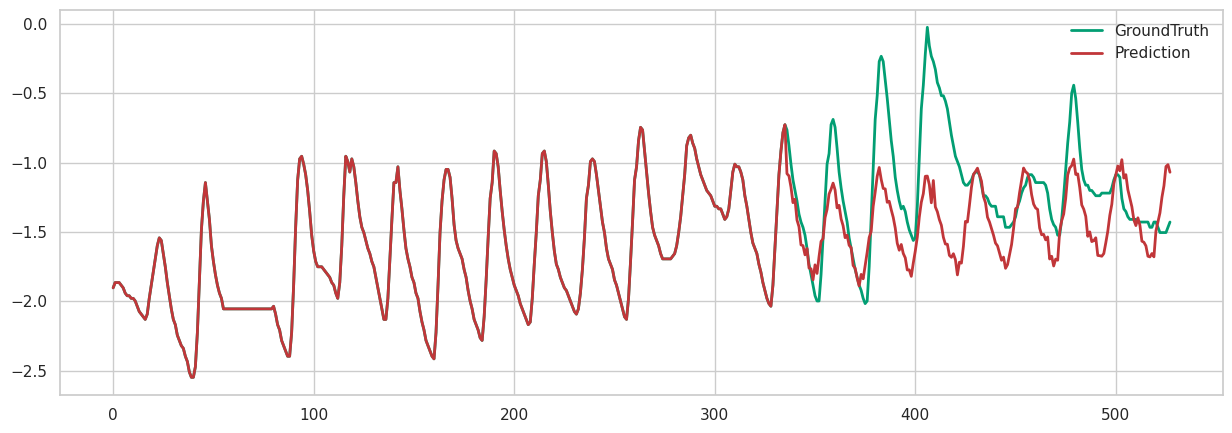

In [92]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: PatchTST/64, Dataset:ETTh2,  Metric: 192

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [93]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 192, Number of Patches: 64


### Training

In [94]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
val 2689
test 2689
	iters: 100, epoch: 1 | loss: 1.1105701
	speed: 0.0132s/iter; left time: 65.5031s
	iters: 200, epoch: 1 | loss: 1.0537816
	speed: 0.0136s/iter; left time: 66.1779s
Epoch: 1 cost time: 3.4303348064422607
Epoch: 1, Steps: 253 | Train Loss: 1.1753108 Vali Loss: 0.8218145 Test Loss: 1.4023248
>>> Validation loss decreased (inf --> 0.821814).  Saving model ...
Updating learning rate to 1.043906679277449e-05
	iters: 100, epoch: 2 | loss: 0.6605243
	speed: 0.0305s/iter; left time: 143.5928s
	iters: 200, epoch: 2 | loss: 0.7729276
	speed: 0.0131s/iter; left time: 60.4614s
Epoch: 2 cost time: 3.3597753047943115
Epoch: 2, Steps: 253 | Train Loss: 0.8343007 Vali Loss: 0.4397330 Test Loss: 0.5166547
>>> Validation loss decreased (0.821814 --> 0.439733).  Saving model ...
Updating learning rate to 2.8028701289355807e-05
	iters: 100, epoch: 3 | loss: 0.4879510
	speed: 0.0307s/iter; left time: 136.6327s
	iters: 200, epoch: 3 | loss: 0.4977718
	speed: 0.01

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2689
mae:0.42102932929992676, mse:0.3862384259700775, rmse:0.6214808225631714, mape:1.5296658277511597, mspe:362.2091979980469


<Figure size 1500x500 with 0 Axes>

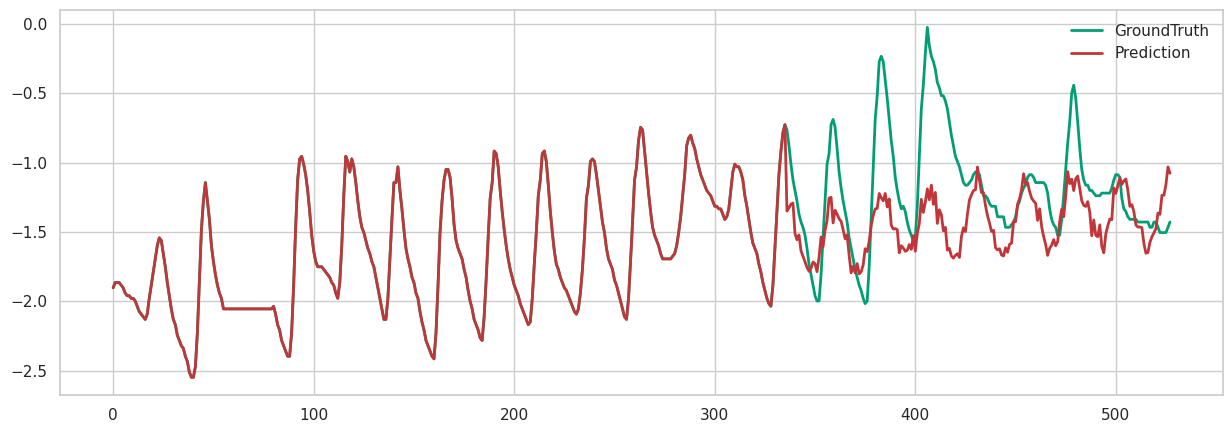

In [95]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 5: PatchTST/42, Dataset:ETTh2,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [102]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 336, Number of Patches: 42


### Training

In [103]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
val 2545
test 2545
	iters: 100, epoch: 1 | loss: 1.3863987
	speed: 0.0177s/iter; left time: 86.2888s
	iters: 200, epoch: 1 | loss: 1.0800730
	speed: 0.0137s/iter; left time: 65.3268s
Epoch: 1 cost time: 3.780229330062866
Epoch: 1, Steps: 249 | Train Loss: 1.2030681 Vali Loss: 0.8809324 Test Loss: 1.4469889
>>> Validation loss decreased (inf --> 0.880932).  Saving model ...
Updating learning rate to 1.0439200033604914e-05
	iters: 100, epoch: 2 | loss: 0.8221075
	speed: 0.0288s/iter; left time: 133.5481s
	iters: 200, epoch: 2 | loss: 0.9748913
	speed: 0.0129s/iter; left time: 58.5689s
Epoch: 2 cost time: 3.2225444316864014
Epoch: 2, Steps: 249 | Train Loss: 0.8851697 Vali Loss: 0.5176836 Test Loss: 0.5135154
>>> Validation loss decreased (0.880932 --> 0.517684).  Saving model ...
Updating learning rate to 2.8029162756387237e-05
	iters: 100, epoch: 3 | loss: 1.1704683
	speed: 0.0288s/iter; left time: 126.1285s
	iters: 200, epoch: 3 | loss: 0.9966028
	speed: 0.01

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2545
mae:0.4580073058605194, mse:0.44554176926612854, rmse:0.6674891710281372, mape:1.5942505598068237, mspe:363.9229431152344


<Figure size 1500x500 with 0 Axes>

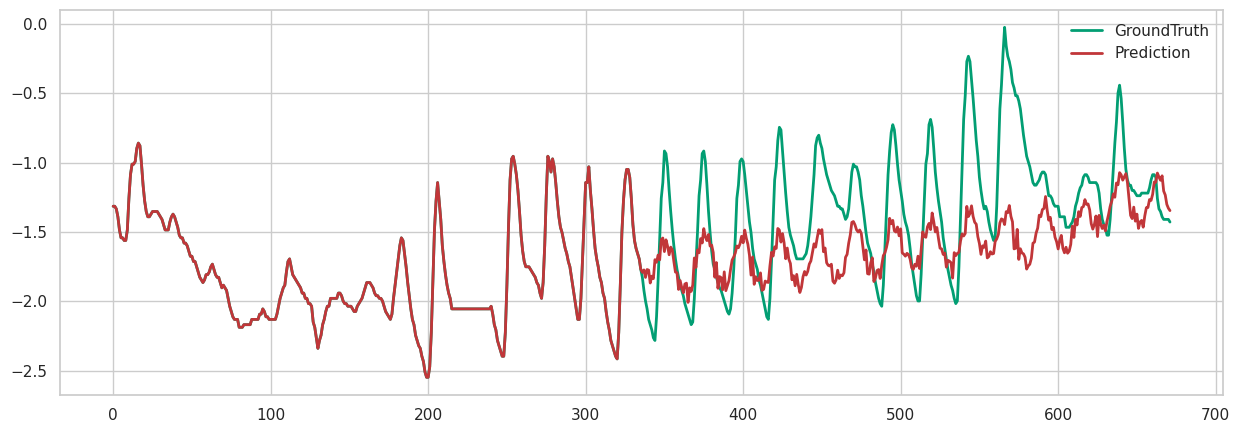

In [104]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 6: PatchTST/64, Dataset:ETTh2,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [106]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 336, Number of Patches: 64


### Training

In [107]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
val 2545
test 2545
	iters: 100, epoch: 1 | loss: 1.4433903
	speed: 0.0131s/iter; left time: 64.0364s
	iters: 200, epoch: 1 | loss: 0.9807917
	speed: 0.0132s/iter; left time: 63.1055s
Epoch: 1 cost time: 3.281599283218384
Epoch: 1, Steps: 249 | Train Loss: 1.2111921 Vali Loss: 0.9139534 Test Loss: 1.5473233
>>> Validation loss decreased (inf --> 0.913953).  Saving model ...
Updating learning rate to 1.0439200033604914e-05
	iters: 100, epoch: 2 | loss: 1.0226265
	speed: 0.0291s/iter; left time: 134.8641s
	iters: 200, epoch: 2 | loss: 0.7036373
	speed: 0.0136s/iter; left time: 61.7370s
Epoch: 2 cost time: 3.3086602687835693
Epoch: 2, Steps: 249 | Train Loss: 0.8796986 Vali Loss: 0.4998447 Test Loss: 0.4921815
>>> Validation loss decreased (0.913953 --> 0.499845).  Saving model ...
Updating learning rate to 2.8029162756387237e-05
	iters: 100, epoch: 3 | loss: 0.5980462
	speed: 0.0293s/iter; left time: 128.5426s
	iters: 200, epoch: 3 | loss: 0.7035702
	speed: 0.01

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 2545
mae:0.4836207628250122, mse:0.48368486762046814, rmse:0.6954745650291443, mape:1.5697417259216309, mspe:349.84454345703125


<Figure size 1500x500 with 0 Axes>

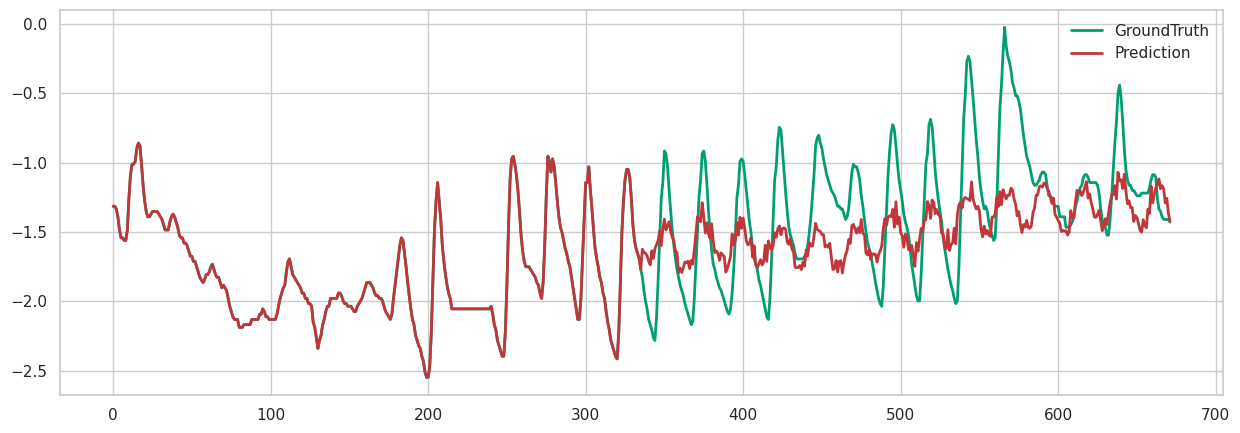

In [108]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 7: PatchTST/42, Dataset:ETTh2,  Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [139]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 720, Number of Patches: 42


### Training

In [140]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
val 2161
test 2161
	iters: 100, epoch: 1 | loss: 1.4601065
	speed: 0.0137s/iter; left time: 63.3506s
	iters: 200, epoch: 1 | loss: 1.1722846
	speed: 0.0137s/iter; left time: 62.2929s
Epoch: 1 cost time: 3.255025863647461
Epoch: 1, Steps: 237 | Train Loss: 1.2274919 Vali Loss: 1.0084171 Test Loss: 1.5464524
>>> Validation loss decreased (inf --> 1.008417).  Saving model ...
Updating learning rate to 1.0439626769181667e-05
	iters: 100, epoch: 2 | loss: 0.7188800
	speed: 0.0294s/iter; left time: 129.5531s
	iters: 200, epoch: 2 | loss: 0.9126453
	speed: 0.0144s/iter; left time: 61.8488s
Epoch: 2 cost time: 3.4441914558410645
Epoch: 2, Steps: 237 | Train Loss: 0.9840267 Vali Loss: 0.7790626 Test Loss: 0.7247556
>>> Validation loss decreased (1.008417 --> 0.779063).  Saving model ...
Updating learning rate to 2.8030640704794897e-05
	iters: 100, epoch: 3 | loss: 0.7631902
	speed: 0.0307s/iter; left time: 127.7632s
	iters: 200, epoch: 3 | loss: 0.8331215
	speed: 0.01

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=6, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1):

### Testing

test 2161
mae:0.5201277136802673, mse:0.5318570733070374, rmse:0.7292852997779846, mape:1.6929426193237305, mspe:383.08465576171875


<Figure size 1500x500 with 0 Axes>

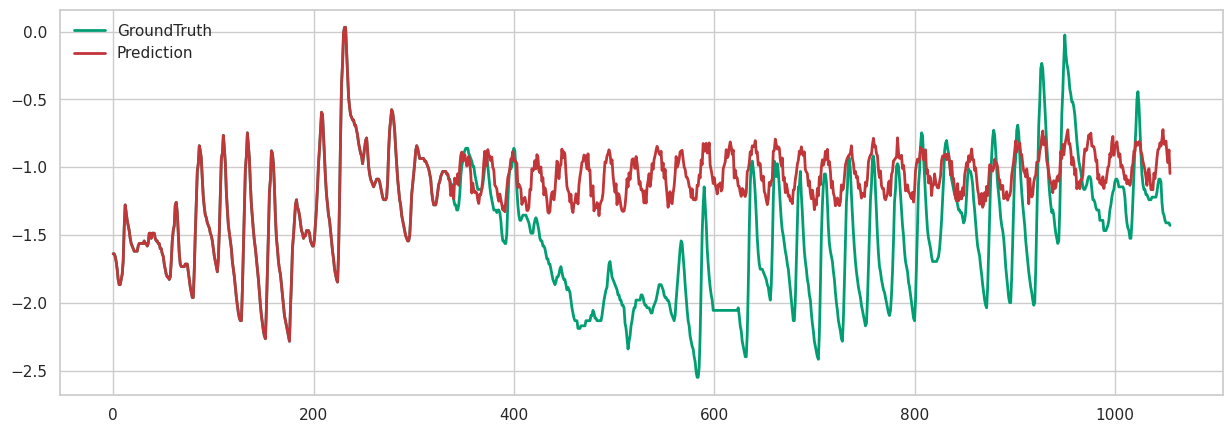

In [141]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 8: PatchTST/64, Dataset:ETTh2,  Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [136]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTh2, Prediction Length: 720, Number of Patches: 64


### Training

In [137]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
val 2161
test 2161
	iters: 100, epoch: 1 | loss: 1.2331128
	speed: 0.0132s/iter; left time: 61.4554s
	iters: 200, epoch: 1 | loss: 0.9970850
	speed: 0.0132s/iter; left time: 60.1626s
Epoch: 1 cost time: 3.149136543273926
Epoch: 1, Steps: 237 | Train Loss: 1.2556141 Vali Loss: 1.0667527 Test Loss: 1.9091151
>>> Validation loss decreased (inf --> 1.066753).  Saving model ...
Updating learning rate to 1.0439626769181667e-05
	iters: 100, epoch: 2 | loss: 0.9750206
	speed: 0.0276s/iter; left time: 121.4290s
	iters: 200, epoch: 2 | loss: 1.0449160
	speed: 0.0132s/iter; left time: 56.8918s
Epoch: 2 cost time: 3.339329719543457
Epoch: 2, Steps: 237 | Train Loss: 1.0004941 Vali Loss: 0.7911423 Test Loss: 0.9123935
>>> Validation loss decreased (1.066753 --> 0.791142).  Saving model ...
Updating learning rate to 2.8030640704794897e-05
	iters: 100, epoch: 3 | loss: 0.6078886
	speed: 0.0333s/iter; left time: 138.5690s
	iters: 200, epoch: 3 | loss: 0.6133743
	speed: 0.013

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=6, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1):

### Testing

test 2161
mae:0.47858762741088867, mse:0.4572766423225403, rmse:0.6762223243713379, mape:1.7331846952438354, mspe:413.947021484375


<Figure size 1500x500 with 0 Axes>

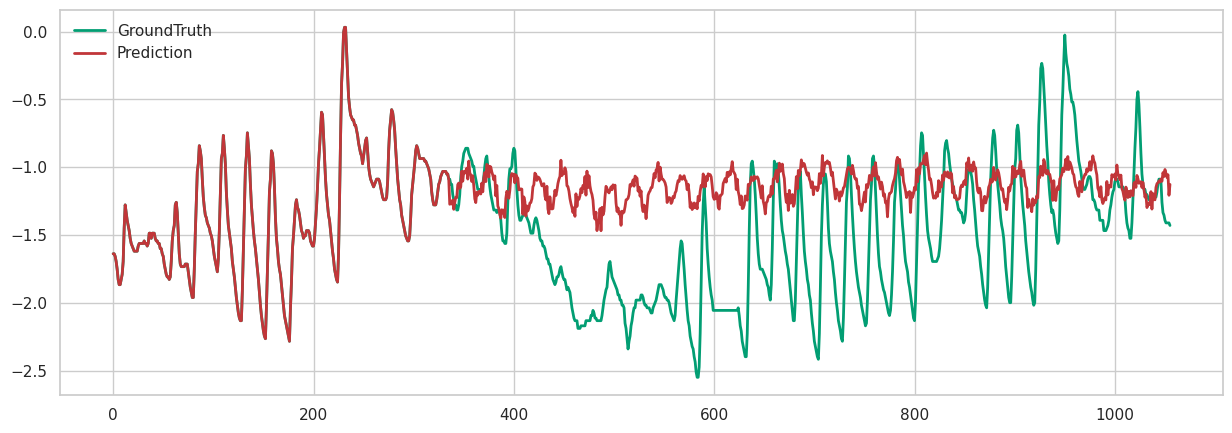

In [138]:
exp.test(setting)
torch.cuda.empty_cache()

### Compare our results with paper results

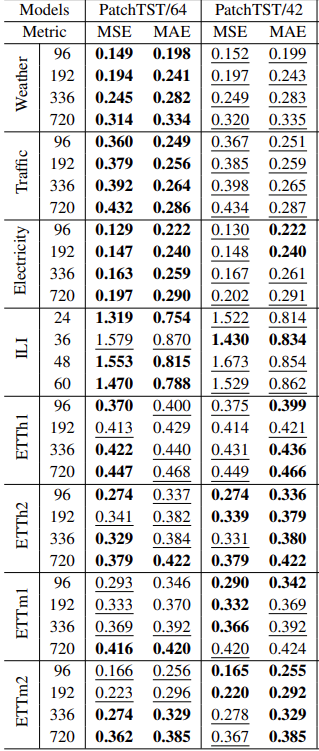

In [4]:
from IPython.display import Image
Image(filename=r"./Images/PatchTST Results.PNG")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| PatchTST/42 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTh2 | 96 | 0.2993590533733368 | 0.3576628863811493 |
|  | ETTh2 | 192 | 0.39204034209251404 | **0.42008212208747864** |
|  | ETTh2 | 336 | **0.44554176926612854** | **0.4580073058605194** |
|  | ETTh2 | 720 | 0.5318570733070374 | 0.5201277136802673 |


| PatchTST/64 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTh2 | 96 | **0.29625624418258667** | **0.35635489225387573** |
|  | ETTh2 | 192 | **0.3862384259700775** | 0.42102932929992676 |
|  | ETTh2 | 336 | 0.48368486762046814 | 0.4836207628250122 |
|  | ETTh2 | 720 | **0.4572766423225403** | **0.47858762741088867** |


---
# Working on ETTm1 Dataset
---

## Trail 1: PatchTST/42, Dataset:ETTm1,  Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [150]:
args.data_path = 'ETTm1.csv' # data file
args.data = 'ETTm1'  # data
args.pred_len = 96 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length : {args.pred_len}, Number of Patches: {args.num_patch} ") 

Dataset: ETTm1, Prediction Length : 96, Number of Patches: 42 


### Training

In [151]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
val 11425
test 11425
	iters: 100, epoch: 1 | loss: 1.1724082
	speed: 0.0129s/iter; left time: 273.1904s
	iters: 200, epoch: 1 | loss: 1.1330628
	speed: 0.0163s/iter; left time: 344.8187s
	iters: 300, epoch: 1 | loss: 1.0387909
	speed: 0.0146s/iter; left time: 306.1855s
	iters: 400, epoch: 1 | loss: 0.9224305
	speed: 0.0128s/iter; left time: 268.0540s
	iters: 500, epoch: 1 | loss: 0.7170345
	speed: 0.0140s/iter; left time: 292.4713s
	iters: 600, epoch: 1 | loss: 0.6197866
	speed: 0.0127s/iter; left time: 263.4646s
	iters: 700, epoch: 1 | loss: 0.6419073
	speed: 0.0131s/iter; left time: 270.5066s
	iters: 800, epoch: 1 | loss: 0.6164076
	speed: 0.0130s/iter; left time: 267.5663s
	iters: 900, epoch: 1 | loss: 0.6953027
	speed: 0.0129s/iter; left time: 262.5101s
	iters: 1000, epoch: 1 | loss: 0.5426523
	speed: 0.0130s/iter; left time: 263.7430s
Epoch: 1 cost time: 14.392822504043579
Epoch: 1, Steps: 1066 | Train Loss: 0.8392047 Vali Loss: 0.7079249 Test Loss: 0.5

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11425
mae:0.3523848056793213, mse:0.2995269000530243, rmse:0.5472905039787292, mape:1.9789750576019287, mspe:280.9017333984375


<Figure size 1500x500 with 0 Axes>

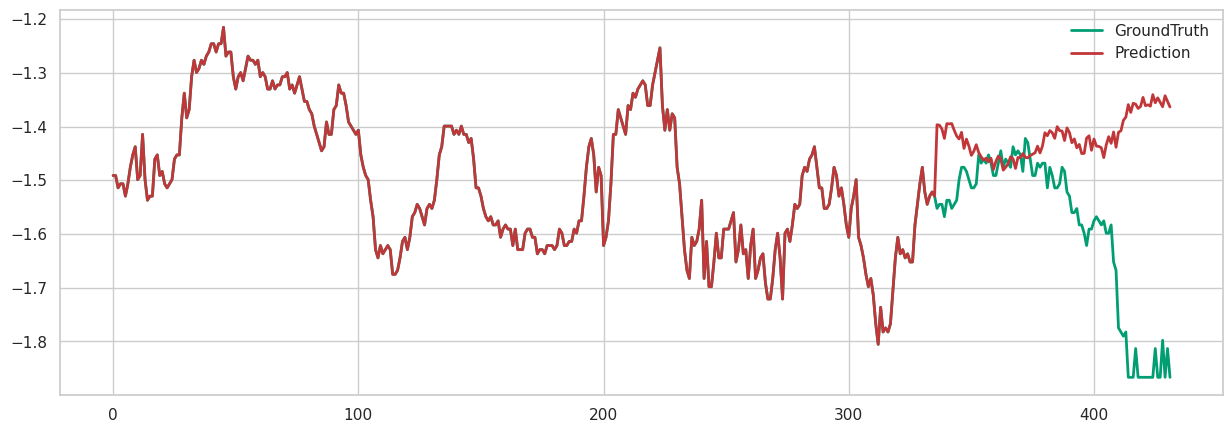

In [146]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: PatchTST/64, Dataset:ETTm1 , Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [164]:
args.pred_len = 96 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 96, Number of Patches: 64


### Training

In [165]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
val 11425
test 11425
	iters: 100, epoch: 1 | loss: 1.1391488
	speed: 0.0135s/iter; left time: 286.4625s
	iters: 200, epoch: 1 | loss: 0.9390472
	speed: 0.0131s/iter; left time: 276.8840s
	iters: 300, epoch: 1 | loss: 0.9183248
	speed: 0.0134s/iter; left time: 280.9288s
	iters: 400, epoch: 1 | loss: 0.7858390
	speed: 0.0130s/iter; left time: 273.0123s
	iters: 500, epoch: 1 | loss: 0.7198462
	speed: 0.0129s/iter; left time: 269.3809s
	iters: 600, epoch: 1 | loss: 0.6931886
	speed: 0.0136s/iter; left time: 282.2801s
	iters: 700, epoch: 1 | loss: 0.6328214
	speed: 0.0134s/iter; left time: 276.9883s
	iters: 800, epoch: 1 | loss: 0.5822279
	speed: 0.0128s/iter; left time: 263.3113s
	iters: 900, epoch: 1 | loss: 0.5983567
	speed: 0.0130s/iter; left time: 265.6624s
	iters: 1000, epoch: 1 | loss: 0.5914106
	speed: 0.0129s/iter; left time: 262.0644s
Epoch: 1 cost time: 14.333354949951172
Epoch: 1, Steps: 1066 | Train Loss: 0.7853815 Vali Loss: 0.7206278 Test Loss: 0.5

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11425
mae:0.3514324724674225, mse:0.2986705005168915, rmse:0.5465075373649597, mape:1.9849482774734497, mspe:285.70416259765625


<Figure size 1500x500 with 0 Axes>

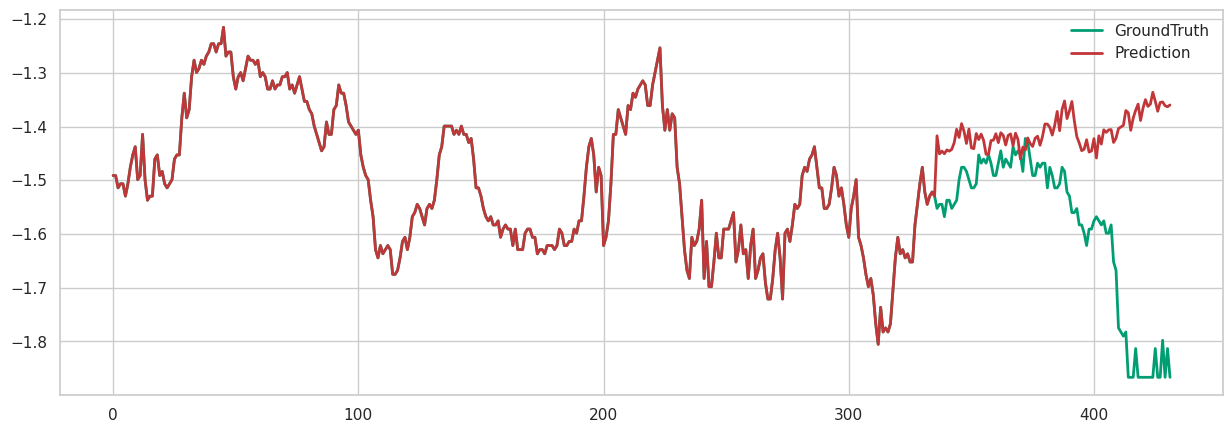

In [166]:
exp.test(setting)
torch.cuda.empty_cache()    

---
## Trail 3: PatchTST/42, Dataset:ETTm1,  Metric: 192

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [168]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 192, Number of Patches: 42


### Training

In [169]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
val 11329
test 11329
	iters: 100, epoch: 1 | loss: 1.1683227
	speed: 0.0132s/iter; left time: 279.1609s
	iters: 200, epoch: 1 | loss: 0.9908437
	speed: 0.0131s/iter; left time: 276.2105s
	iters: 300, epoch: 1 | loss: 0.9391273
	speed: 0.0129s/iter; left time: 271.0263s
	iters: 400, epoch: 1 | loss: 0.8959532
	speed: 0.0131s/iter; left time: 272.4185s
	iters: 500, epoch: 1 | loss: 0.8897805
	speed: 0.0135s/iter; left time: 281.0843s
	iters: 600, epoch: 1 | loss: 0.7978597
	speed: 0.0134s/iter; left time: 277.4045s
	iters: 700, epoch: 1 | loss: 0.6647913
	speed: 0.0130s/iter; left time: 268.2767s
	iters: 800, epoch: 1 | loss: 0.6456211
	speed: 0.0130s/iter; left time: 266.1542s
	iters: 900, epoch: 1 | loss: 0.5884722
	speed: 0.0131s/iter; left time: 267.6983s
	iters: 1000, epoch: 1 | loss: 0.5573106
	speed: 0.0131s/iter; left time: 265.7756s
Epoch: 1 cost time: 13.993080377578735
Epoch: 1, Steps: 1063 | Train Loss: 0.8312362 Vali Loss: 0.7816170 Test Loss: 0.5

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11329
mae:0.37422990798950195, mse:0.33866047859191895, rmse:0.5819454193115234, mape:2.04382061958313, mspe:297.583984375


<Figure size 1500x500 with 0 Axes>

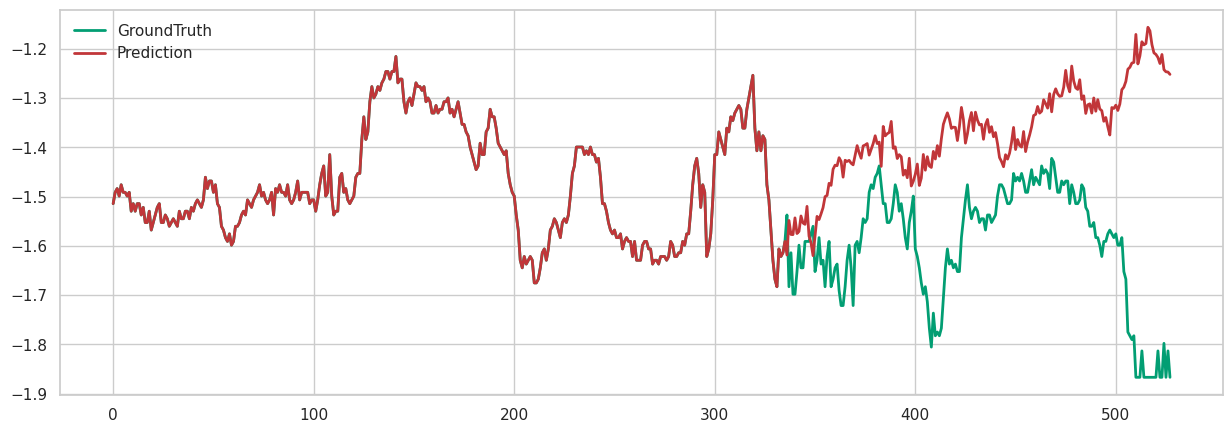

In [158]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: PatchTST/64, Dataset:ETTm1,  Metric: 192

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [171]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 192, Number of Patches: 64


### Training

In [172]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
val 11329
test 11329
	iters: 100, epoch: 1 | loss: 1.3808131
	speed: 0.0132s/iter; left time: 278.9512s
	iters: 200, epoch: 1 | loss: 1.1687361
	speed: 0.0132s/iter; left time: 277.9908s
	iters: 300, epoch: 1 | loss: 0.9949650
	speed: 0.0131s/iter; left time: 274.3326s
	iters: 400, epoch: 1 | loss: 0.9098991
	speed: 0.0131s/iter; left time: 273.0410s
	iters: 500, epoch: 1 | loss: 0.7526750
	speed: 0.0132s/iter; left time: 273.6501s
	iters: 600, epoch: 1 | loss: 0.7863783
	speed: 0.0132s/iter; left time: 272.5961s
	iters: 700, epoch: 1 | loss: 0.6775575
	speed: 0.0141s/iter; left time: 288.9124s
	iters: 800, epoch: 1 | loss: 0.7457781
	speed: 0.0136s/iter; left time: 277.4560s
	iters: 900, epoch: 1 | loss: 0.6636244
	speed: 0.0136s/iter; left time: 277.0382s
	iters: 1000, epoch: 1 | loss: 0.6762596
	speed: 0.0132s/iter; left time: 266.5463s
Epoch: 1 cost time: 14.183627843856812
Epoch: 1, Steps: 1063 | Train Loss: 0.8844767 Vali Loss: 0.8126804 Test Loss: 0.5

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11329
mae:0.38036438822746277, mse:0.3390999734401703, rmse:0.582322895526886, mape:2.0368294715881348, mspe:286.2663879394531


<Figure size 1500x500 with 0 Axes>

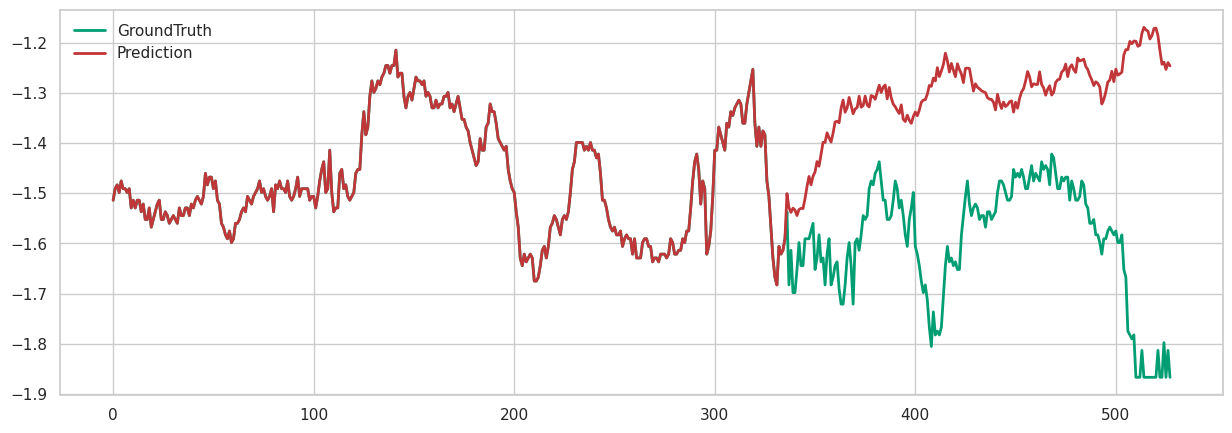

In [173]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 5: PatchTST/42, Dataset:ETTm1,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [174]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 336, Number of Patches: 42


### Training

In [175]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
val 11185
test 11185
	iters: 100, epoch: 1 | loss: 1.0964019
	speed: 0.0133s/iter; left time: 281.3275s
	iters: 200, epoch: 1 | loss: 1.0646673
	speed: 0.0149s/iter; left time: 311.7832s
	iters: 300, epoch: 1 | loss: 0.8937188
	speed: 0.0167s/iter; left time: 348.2770s
	iters: 400, epoch: 1 | loss: 0.8788067
	speed: 0.0131s/iter; left time: 273.1118s
	iters: 500, epoch: 1 | loss: 0.8587827
	speed: 0.0132s/iter; left time: 273.3203s
	iters: 600, epoch: 1 | loss: 0.7320264
	speed: 0.0131s/iter; left time: 269.1700s
	iters: 700, epoch: 1 | loss: 0.6976120
	speed: 0.0138s/iter; left time: 281.9797s
	iters: 800, epoch: 1 | loss: 0.7014153
	speed: 0.0131s/iter; left time: 267.0068s
	iters: 900, epoch: 1 | loss: 0.6673856
	speed: 0.0135s/iter; left time: 273.6364s
	iters: 1000, epoch: 1 | loss: 0.5793259
	speed: 0.0133s/iter; left time: 267.7237s
Epoch: 1 cost time: 14.587589263916016
Epoch: 1, Steps: 1059 | Train Loss: 0.8227653 Vali Loss: 0.8753008 Test Loss: 0.5

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11185
mae:0.3980482816696167, mse:0.371663361787796, rmse:0.609641969203949, mape:2.1143510341644287, mspe:318.17864990234375


<Figure size 1500x500 with 0 Axes>

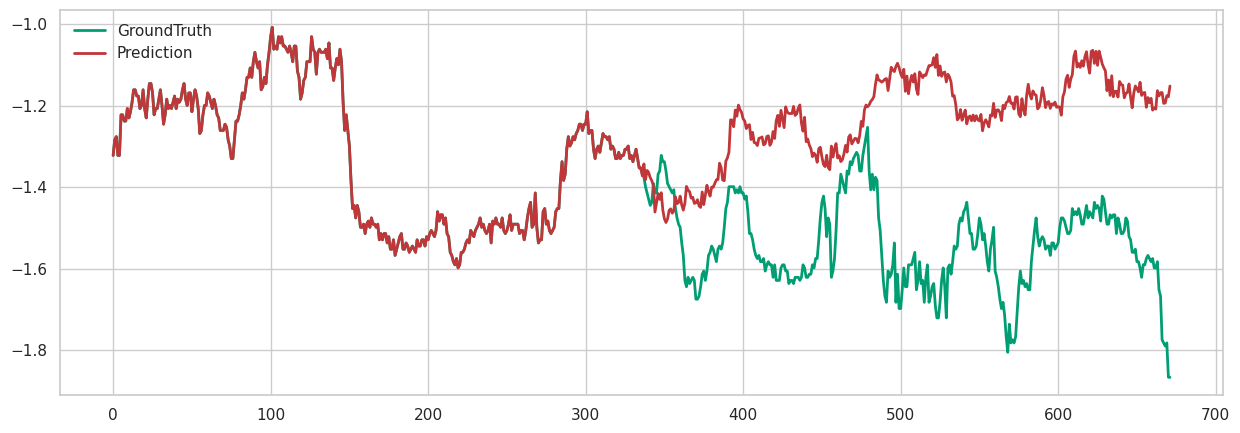

In [176]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 6: PatchTST/64, Dataset:ETTm1,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [177]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 336, Number of Patches: 64


### Training

In [178]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
val 11185
test 11185
	iters: 100, epoch: 1 | loss: 1.1554893
	speed: 0.0138s/iter; left time: 290.3577s
	iters: 200, epoch: 1 | loss: 1.0450020
	speed: 0.0133s/iter; left time: 279.3180s
	iters: 300, epoch: 1 | loss: 0.8951449
	speed: 0.0133s/iter; left time: 277.9157s
	iters: 400, epoch: 1 | loss: 0.8527930
	speed: 0.0136s/iter; left time: 283.2012s
	iters: 500, epoch: 1 | loss: 0.7490291
	speed: 0.0156s/iter; left time: 321.6510s
	iters: 600, epoch: 1 | loss: 0.6619081
	speed: 0.0134s/iter; left time: 276.4202s
	iters: 700, epoch: 1 | loss: 0.6791568
	speed: 0.0133s/iter; left time: 272.2613s
	iters: 800, epoch: 1 | loss: 0.6208860
	speed: 0.0167s/iter; left time: 340.2260s
	iters: 900, epoch: 1 | loss: 0.5441263
	speed: 0.0158s/iter; left time: 320.9947s
	iters: 1000, epoch: 1 | loss: 0.5876285
	speed: 0.0133s/iter; left time: 267.6201s
Epoch: 1 cost time: 15.00909686088562
Epoch: 1, Steps: 1059 | Train Loss: 0.8255982 Vali Loss: 0.9076418 Test Loss: 0.59

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11185
mae:0.39804011583328247, mse:0.36944442987442017, rmse:0.6078193783760071, mape:2.0687034130096436, mspe:278.17218017578125


<Figure size 1500x500 with 0 Axes>

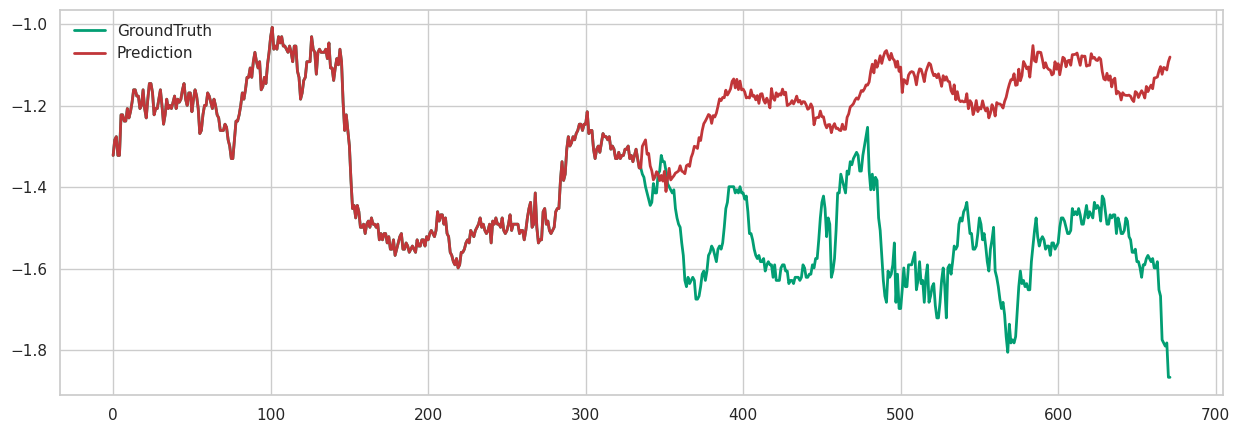

In [179]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 7: PatchTST/42, Dataset:ETTm1,  Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [180]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 720, Number of Patches: 42


### Training

In [181]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
val 10801
test 10801
	iters: 100, epoch: 1 | loss: 1.1836275
	speed: 0.0143s/iter; left time: 298.2791s
	iters: 200, epoch: 1 | loss: 1.0966704
	speed: 0.0137s/iter; left time: 284.6396s
	iters: 300, epoch: 1 | loss: 0.9342594
	speed: 0.0138s/iter; left time: 284.3076s
	iters: 400, epoch: 1 | loss: 0.8571801
	speed: 0.0136s/iter; left time: 280.3149s
	iters: 500, epoch: 1 | loss: 0.7858492
	speed: 0.0166s/iter; left time: 339.8289s
	iters: 600, epoch: 1 | loss: 0.7051578
	speed: 0.0142s/iter; left time: 288.9157s
	iters: 700, epoch: 1 | loss: 0.7951351
	speed: 0.0138s/iter; left time: 278.4280s
	iters: 800, epoch: 1 | loss: 0.7322535
	speed: 0.0137s/iter; left time: 275.2503s
	iters: 900, epoch: 1 | loss: 0.6991921
	speed: 0.0138s/iter; left time: 276.2746s
	iters: 1000, epoch: 1 | loss: 0.6338535
	speed: 0.0135s/iter; left time: 270.1063s
Epoch: 1 cost time: 15.068022966384888
Epoch: 1, Steps: 1047 | Train Loss: 0.8620633 Vali Loss: 1.1048074 Test Loss: 0.6

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 10801
mae:0.44118785858154297, mse:0.4429953992366791, rmse:0.6655790209770203, mape:2.245023727416992, mspe:329.9082946777344


<Figure size 1500x500 with 0 Axes>

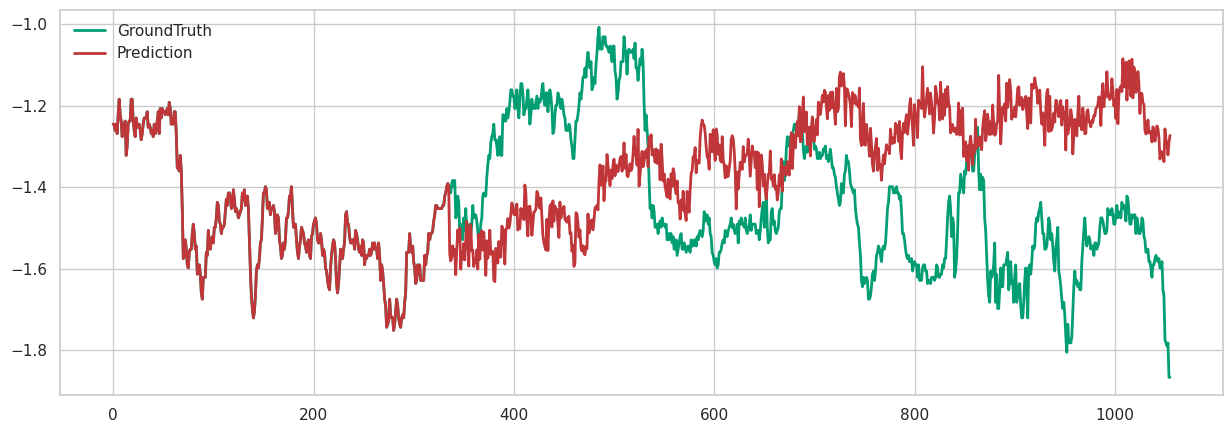

In [182]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 8: PatchTST/64, Dataset:ETTm1,  Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [183]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm1, Prediction Length: 720, Number of Patches: 64


### Training

In [184]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
val 10801
test 10801
	iters: 100, epoch: 1 | loss: 1.1588453
	speed: 0.0143s/iter; left time: 298.7937s
	iters: 200, epoch: 1 | loss: 1.0474212
	speed: 0.0144s/iter; left time: 299.5959s
	iters: 300, epoch: 1 | loss: 0.9622461
	speed: 0.0142s/iter; left time: 292.8617s
	iters: 400, epoch: 1 | loss: 0.9235277
	speed: 0.0138s/iter; left time: 283.9969s
	iters: 500, epoch: 1 | loss: 0.7569240
	speed: 0.0136s/iter; left time: 277.5594s
	iters: 600, epoch: 1 | loss: 0.8062435
	speed: 0.0139s/iter; left time: 282.9806s
	iters: 700, epoch: 1 | loss: 0.6970413
	speed: 0.0162s/iter; left time: 327.3742s
	iters: 800, epoch: 1 | loss: 0.7510831
	speed: 0.0139s/iter; left time: 280.1562s
	iters: 900, epoch: 1 | loss: 0.6877741
	speed: 0.0146s/iter; left time: 292.6461s
	iters: 1000, epoch: 1 | loss: 0.6122674
	speed: 0.0140s/iter; left time: 279.9347s
Epoch: 1 cost time: 15.01228666305542
Epoch: 1, Steps: 1047 | Train Loss: 0.8562514 Vali Loss: 1.1021816 Test Loss: 0.60

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 10801
mae:0.4351019263267517, mse:0.43398869037628174, rmse:0.658778190612793, mape:2.192382335662842, mspe:337.3619079589844


<Figure size 1500x500 with 0 Axes>

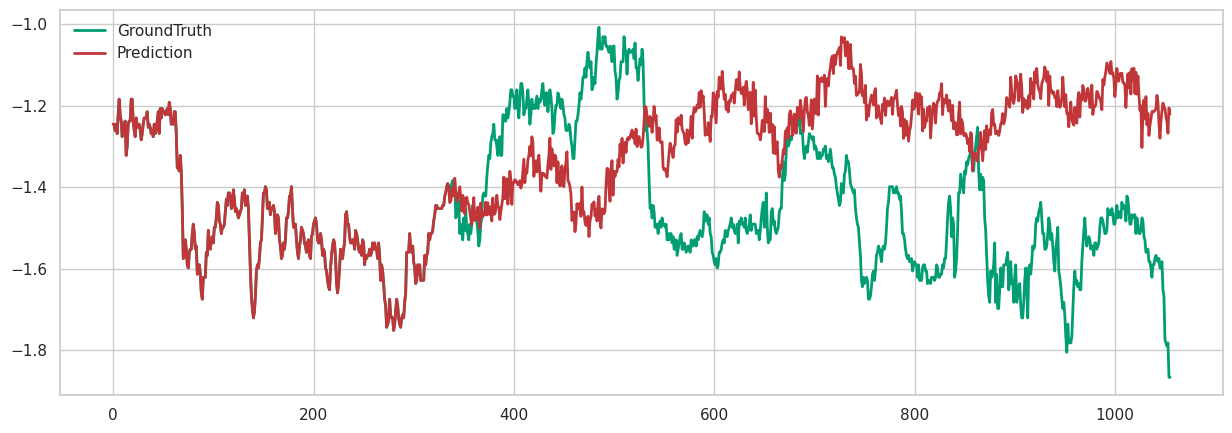

In [185]:
exp.test(setting)
torch.cuda.empty_cache()

### Compare our results with paper results

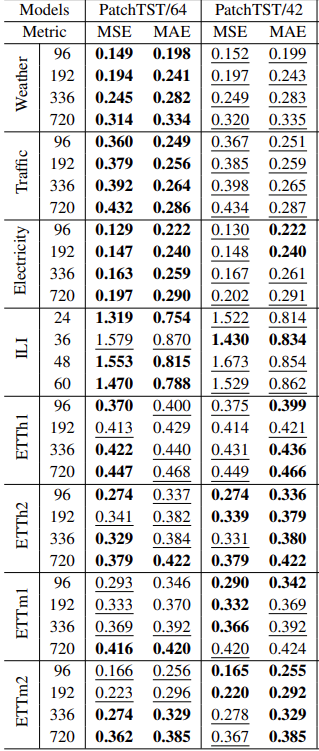

In [5]:
from IPython.display import Image
Image(filename=r"./Images/PatchTST Results.PNG")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| PatchTST/42 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTm1 | 96 | 0.2995269000530243 | 0.3523848056793213 |
|  | ETTm1 | 192 | **0.33866047859191895** | **0.37422990798950195** |
|  | ETTm1 | 336 | 0.371663361787796 | **0.3980482816696167** |
|  | ETTm1 | 720 | 0.4429953992366791 | 0.44118785858154297 |


| PatchTST/64 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTm1 | 96 | **0.2986705005168915** | **0.3514324724674225** |
|  | ETTm1 | 192 | 0.3390999734401703 | 0.38036438822746277 |
|  | ETTm1 | 336 | **0.36944442987442017** | **0.39804011583328247** |
|  | ETTm1 | 720 | **0.43398869037628174** | **0.4351019263267517** |


---
# Working on ETTm2 Dataset
---

## Trail 1: PatchTST/42, Dataset:ETTm2,  Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [192]:
args.data_path = 'ETTm2.csv' # data file
args.data = 'ETTm2'  # data
args.pred_len = 96 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 96, Number of Patches: 42


### Training

In [193]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
val 11425
test 11425
	iters: 100, epoch: 1 | loss: 1.2827471
	speed: 0.0239s/iter; left time: 124.8040s
	iters: 200, epoch: 1 | loss: 1.1519721
	speed: 0.0233s/iter; left time: 119.4494s
Epoch: 1 cost time: 6.419656753540039
Epoch: 1, Steps: 266 | Train Loss: 1.0911248 Vali Loss: 0.6197593 Test Loss: 1.1198705
>>> Validation loss decreased (inf --> 0.619759).  Saving model ...
Updating learning rate to 1.0438661460315324e-05
	iters: 100, epoch: 2 | loss: 0.5561738
	speed: 0.0627s/iter; left time: 310.8455s
	iters: 200, epoch: 2 | loss: 0.4645038
	speed: 0.0235s/iter; left time: 113.9867s
Epoch: 2 cost time: 6.203277111053467
Epoch: 2, Steps: 266 | Train Loss: 0.5900166 Vali Loss: 0.2096559 Test Loss: 0.2844624
>>> Validation loss decreased (0.619759 --> 0.209656).  Saving model ...
Updating learning rate to 2.8027297449571736e-05
	iters: 100, epoch: 3 | loss: 0.5816723
	speed: 0.0607s/iter; left time: 284.4293s
	iters: 200, epoch: 3 | loss: 0.3263161
	speed:

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11425
mae:0.2611851394176483, mse:0.1689293086528778, rmse:0.41101011633872986, mape:1.0476031303405762, mspe:189.85809326171875


<Figure size 1500x500 with 0 Axes>

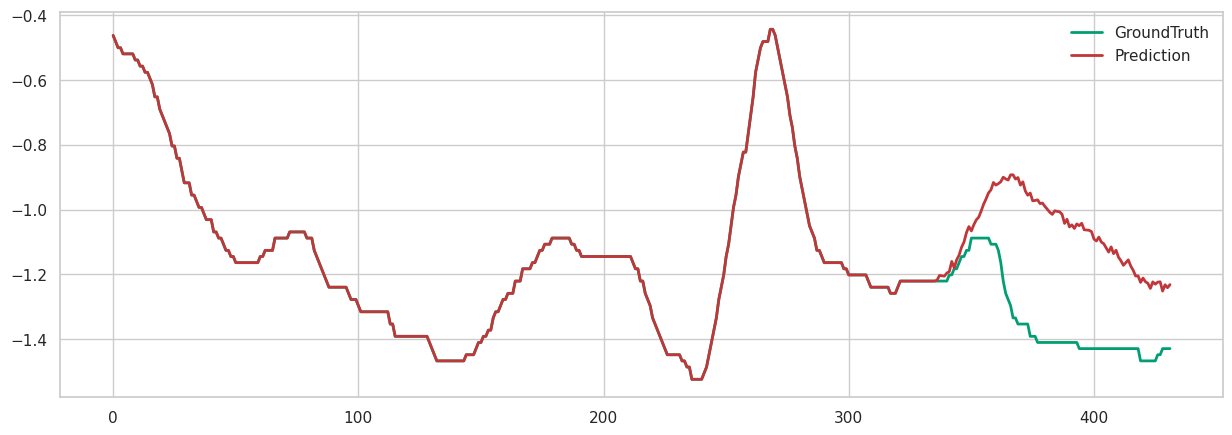

In [194]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: PatchTST/64, Dataset:ETTm2,  Metric: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [195]:
args.pred_len = 96 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 96, Number of Patches: 64


### Training

In [196]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
val 11425
test 11425
	iters: 100, epoch: 1 | loss: 1.0235835
	speed: 0.0242s/iter; left time: 126.0886s
	iters: 200, epoch: 1 | loss: 0.8898367
	speed: 0.0234s/iter; left time: 119.7489s
Epoch: 1 cost time: 6.306246280670166
Epoch: 1, Steps: 266 | Train Loss: 1.0200326 Vali Loss: 0.5342914 Test Loss: 0.9687920
>>> Validation loss decreased (inf --> 0.534291).  Saving model ...
Updating learning rate to 1.0438661460315324e-05
	iters: 100, epoch: 2 | loss: 0.5563033
	speed: 0.0612s/iter; left time: 303.1734s
	iters: 200, epoch: 2 | loss: 0.3766173
	speed: 0.0235s/iter; left time: 114.2034s
Epoch: 2 cost time: 6.384333610534668
Epoch: 2, Steps: 266 | Train Loss: 0.5639089 Vali Loss: 0.2073116 Test Loss: 0.2847702
>>> Validation loss decreased (0.534291 --> 0.207312).  Saving model ...
Updating learning rate to 2.8027297449571736e-05
	iters: 100, epoch: 3 | loss: 0.2992777
	speed: 0.0628s/iter; left time: 294.2458s
	iters: 200, epoch: 3 | loss: 0.3252299
	speed:

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11425
mae:0.25864073634147644, mse:0.1681060492992401, rmse:0.41000738739967346, mape:1.0431785583496094, mspe:188.42576599121094


<Figure size 1500x500 with 0 Axes>

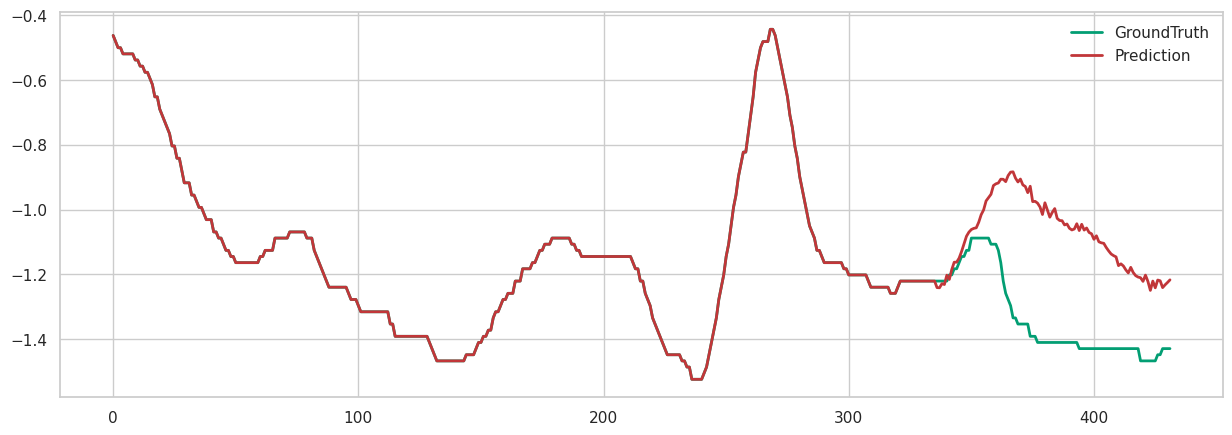

In [197]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: PatchTST/42, Dataset:ETTm2,  Metric: 192

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [198]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 192, Number of Patches: 42


### Training

In [199]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
val 11329
test 11329
	iters: 100, epoch: 1 | loss: 1.1047120
	speed: 0.0247s/iter; left time: 128.4067s
	iters: 200, epoch: 1 | loss: 0.9472126
	speed: 0.0239s/iter; left time: 122.0081s
Epoch: 1 cost time: 6.427405834197998
Epoch: 1, Steps: 265 | Train Loss: 1.1388677 Vali Loss: 0.6908123 Test Loss: 1.2792859
>>> Validation loss decreased (inf --> 0.690812).  Saving model ...
Updating learning rate to 1.0438691226545603e-05
	iters: 100, epoch: 2 | loss: 0.6615469
	speed: 0.0660s/iter; left time: 325.6458s
	iters: 200, epoch: 2 | loss: 0.5661109
	speed: 0.0242s/iter; left time: 116.8940s
Epoch: 2 cost time: 6.432754278182983
Epoch: 2, Steps: 265 | Train Loss: 0.6278734 Vali Loss: 0.2348772 Test Loss: 0.3228492
>>> Validation loss decreased (0.690812 --> 0.234877).  Saving model ...
Updating learning rate to 2.802740054323261e-05
	iters: 100, epoch: 3 | loss: 0.4525523
	speed: 0.0634s/iter; left time: 296.1910s
	iters: 200, epoch: 3 | loss: 0.4191871
	speed: 

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11329
mae:0.2977927625179291, mse:0.2248840183019638, rmse:0.4742193818092346, mape:1.1835787296295166, mspe:206.19515991210938


<Figure size 1500x500 with 0 Axes>

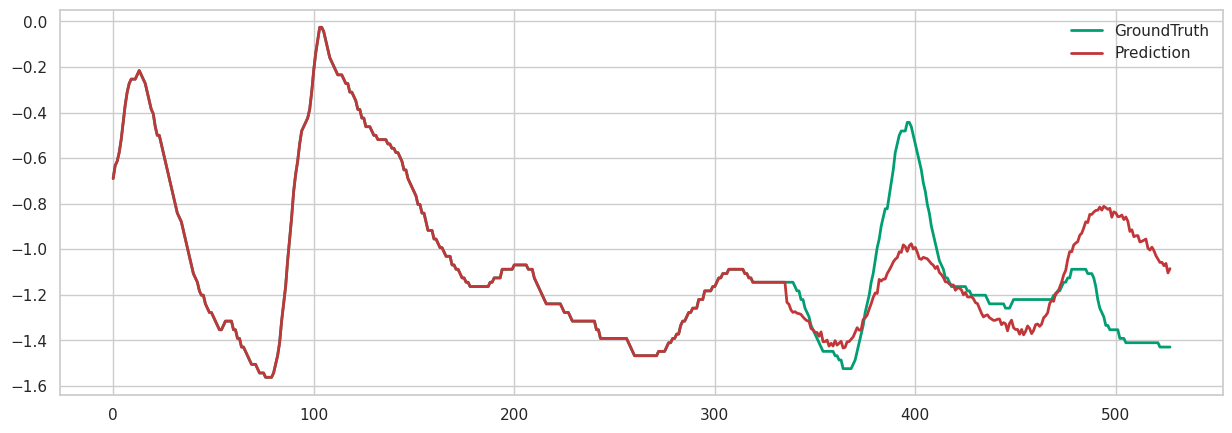

In [200]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: PatchTST/64, Dataset:ETTm2,  Metric: 192

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [201]:
args.pred_len = 192 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 192, Number of Patches: 64


### Training

In [202]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
val 11329
test 11329
	iters: 100, epoch: 1 | loss: 1.2490714
	speed: 0.0259s/iter; left time: 134.8933s
	iters: 200, epoch: 1 | loss: 0.9405968
	speed: 0.0239s/iter; left time: 122.0397s
Epoch: 1 cost time: 6.624375820159912
Epoch: 1, Steps: 265 | Train Loss: 1.1367752 Vali Loss: 0.7378738 Test Loss: 1.3766418
>>> Validation loss decreased (inf --> 0.737874).  Saving model ...
Updating learning rate to 1.0438691226545603e-05
	iters: 100, epoch: 2 | loss: 0.8152621
	speed: 0.0637s/iter; left time: 314.2951s
	iters: 200, epoch: 2 | loss: 0.6407042
	speed: 0.0242s/iter; left time: 116.9070s
Epoch: 2 cost time: 6.420478343963623
Epoch: 2, Steps: 265 | Train Loss: 0.6587026 Vali Loss: 0.2557155 Test Loss: 0.3635500
>>> Validation loss decreased (0.737874 --> 0.255715).  Saving model ...
Updating learning rate to 2.802740054323261e-05
	iters: 100, epoch: 3 | loss: 0.3456138
	speed: 0.0638s/iter; left time: 298.1979s
	iters: 200, epoch: 3 | loss: 0.4259276
	speed: 

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11329
mae:0.3041490614414215, mse:0.23120321333408356, rmse:0.4808359444141388, mape:1.1825203895568848, mspe:208.45849609375


<Figure size 1500x500 with 0 Axes>

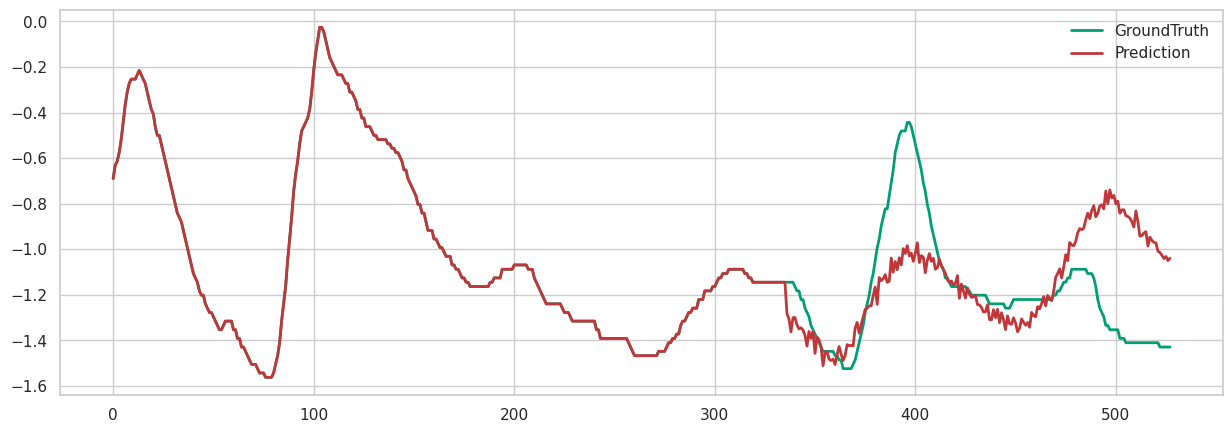

In [203]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 5: PatchTST/42, Dataset:ETTm2,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [204]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 336, Number of Patches: 42


### Training

In [205]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
val 11185
test 11185
	iters: 100, epoch: 1 | loss: 1.3410220
	speed: 0.0254s/iter; left time: 131.4811s
	iters: 200, epoch: 1 | loss: 0.8073128
	speed: 0.0269s/iter; left time: 136.9200s
Epoch: 1 cost time: 6.888467311859131
Epoch: 1, Steps: 264 | Train Loss: 1.0648249 Vali Loss: 0.5925092 Test Loss: 1.0338190
>>> Validation loss decreased (inf --> 0.592509).  Saving model ...
Updating learning rate to 1.0438721218484657e-05
	iters: 100, epoch: 2 | loss: 0.5337418
	speed: 0.0663s/iter; left time: 326.1297s
	iters: 200, epoch: 2 | loss: 0.5233421
	speed: 0.0250s/iter; left time: 120.4048s
Epoch: 2 cost time: 6.53805947303772
Epoch: 2, Steps: 264 | Train Loss: 0.6439984 Vali Loss: 0.2808595 Test Loss: 0.3741229
>>> Validation loss decreased (0.592509 --> 0.280860).  Saving model ...
Updating learning rate to 2.802750441854847e-05
	iters: 100, epoch: 3 | loss: 0.6035756
	speed: 0.0659s/iter; left time: 306.4095s
	iters: 200, epoch: 3 | loss: 0.5609246
	speed: 0

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11185
mae:0.3345499634742737, mse:0.27793970704078674, rmse:0.5271998643875122, mape:1.260105848312378, mspe:235.28697204589844


<Figure size 1500x500 with 0 Axes>

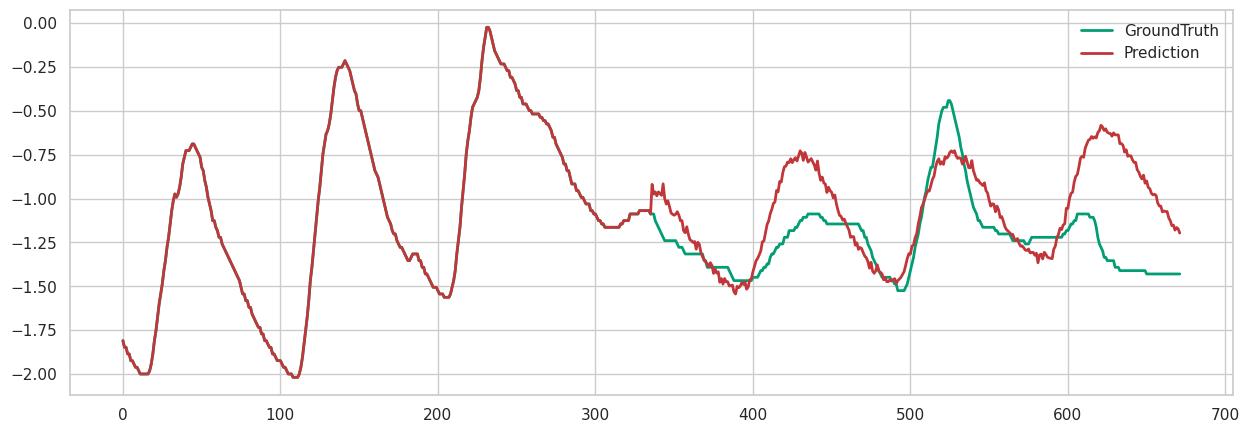

In [206]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 6: PatchTST/64, Dataset:ETTm2,  Metric: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [207]:
args.pred_len = 336 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 336, Number of Patches: 64


### Training

In [208]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
val 11185
test 11185
	iters: 100, epoch: 1 | loss: 1.3492098
	speed: 0.0253s/iter; left time: 131.0959s
	iters: 200, epoch: 1 | loss: 1.0446411
	speed: 0.0249s/iter; left time: 126.5768s
Epoch: 1 cost time: 6.691623210906982
Epoch: 1, Steps: 264 | Train Loss: 1.1017065 Vali Loss: 0.6731766 Test Loss: 1.2239887
>>> Validation loss decreased (inf --> 0.673177).  Saving model ...
Updating learning rate to 1.0438721218484657e-05
	iters: 100, epoch: 2 | loss: 0.7241151
	speed: 0.0681s/iter; left time: 334.9625s
	iters: 200, epoch: 2 | loss: 0.5345472
	speed: 0.0249s/iter; left time: 119.9231s
Epoch: 2 cost time: 6.7010719776153564
Epoch: 2, Steps: 264 | Train Loss: 0.6745019 Vali Loss: 0.2941667 Test Loss: 0.4105117
>>> Validation loss decreased (0.673177 --> 0.294167).  Saving model ...
Updating learning rate to 2.802750441854847e-05
	iters: 100, epoch: 3 | loss: 0.5527453
	speed: 0.0655s/iter; left time: 304.6524s
	iters: 200, epoch: 3 | loss: 0.5267739
	speed:

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 11185
mae:0.33890119194984436, mse:0.28607428073883057, rmse:0.5348591208457947, mape:1.2599034309387207, mspe:227.20216369628906


<Figure size 1500x500 with 0 Axes>

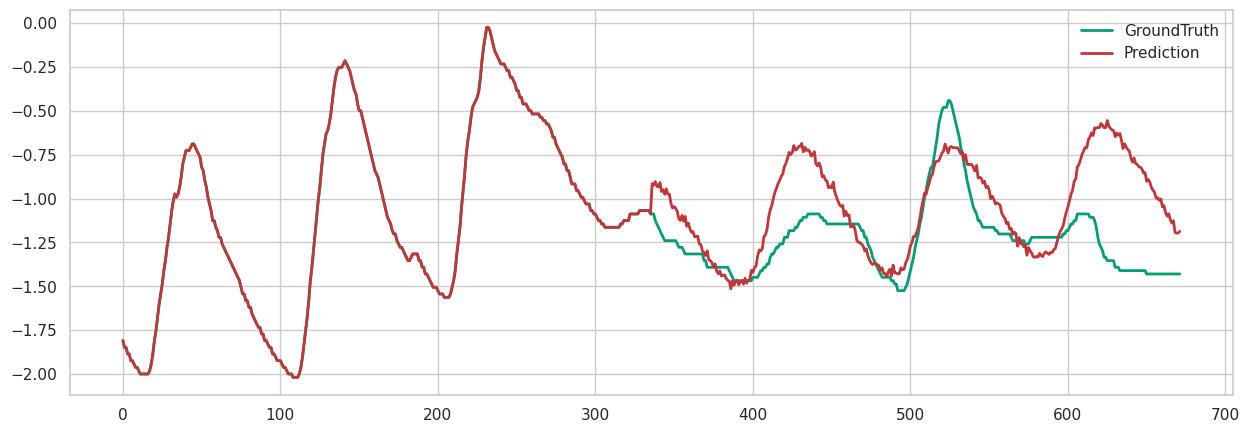

In [209]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 7: PatchTST/42, Dataset:ETTm2,  Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [210]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 42  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 720, Number of Patches: 42


### Training

In [211]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
val 10801
test 10801
	iters: 100, epoch: 1 | loss: 1.0777488
	speed: 0.0262s/iter; left time: 134.3557s
	iters: 200, epoch: 1 | loss: 0.8339497
	speed: 0.0265s/iter; left time: 132.8436s
Epoch: 1 cost time: 6.854940414428711
Epoch: 1, Steps: 261 | Train Loss: 1.1124290 Vali Loss: 0.6744817 Test Loss: 1.2230388
>>> Validation loss decreased (inf --> 0.674482).  Saving model ...
Updating learning rate to 1.0438812574522179e-05
	iters: 100, epoch: 2 | loss: 0.5761588
	speed: 0.0747s/iter; left time: 363.1255s
	iters: 200, epoch: 2 | loss: 0.7762889
	speed: 0.0263s/iter; left time: 125.2970s
Epoch: 2 cost time: 6.861976385116577
Epoch: 2, Steps: 261 | Train Loss: 0.7178328 Vali Loss: 0.3596237 Test Loss: 0.5082483
>>> Validation loss decreased (0.674482 --> 0.359624).  Saving model ...
Updating learning rate to 2.8027820824346e-05
	iters: 100, epoch: 3 | loss: 0.5012361
	speed: 0.0713s/iter; left time: 328.0982s
	iters: 200, epoch: 3 | loss: 0.5135337
	speed: 0.

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 10801
mae:0.4156728684902191, mse:0.40568575263023376, rmse:0.6369346380233765, mape:1.3899706602096558, mspe:240.91477966308594


<Figure size 1500x500 with 0 Axes>

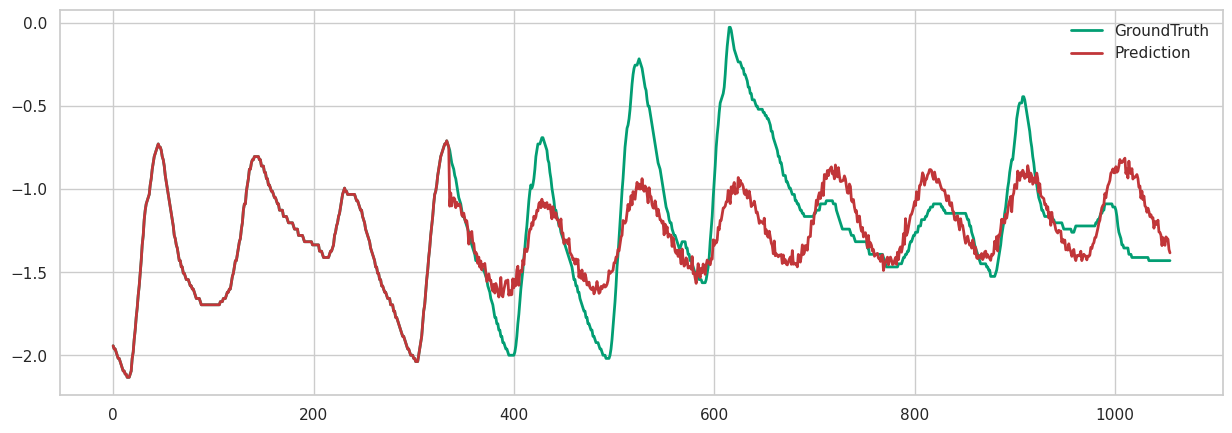

In [212]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 8: PatchTST/64, Dataset:ETTm2,  Metric: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [213]:
args.pred_len = 720 # prediction sequence length
args.num_patch = 64  # The number of input patches
print(f"Dataset: {args.data}, Prediction Length: {args.pred_len}, Number of Patches: {args.num_patch}") 
# print(args)

Dataset: ETTm2, Prediction Length: 720, Number of Patches: 42


### Training

In [214]:
Exp = Exp_Main
setting=f'PatchTST_train_on_{args.data}_{args.pred_len}_{args.num_patch}'
# set experiments
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
val 10801
test 10801
	iters: 100, epoch: 1 | loss: 1.0403298
	speed: 0.0286s/iter; left time: 146.5941s
	iters: 200, epoch: 1 | loss: 0.9170922
	speed: 0.0258s/iter; left time: 129.4988s
Epoch: 1 cost time: 7.185797929763794
Epoch: 1, Steps: 261 | Train Loss: 1.1005993 Vali Loss: 0.6651667 Test Loss: 1.1920307
>>> Validation loss decreased (inf --> 0.665167).  Saving model ...
Updating learning rate to 1.0438812574522179e-05
	iters: 100, epoch: 2 | loss: 0.6444234
	speed: 0.0735s/iter; left time: 357.0001s
	iters: 200, epoch: 2 | loss: 0.6653578
	speed: 0.0258s/iter; left time: 122.9920s
Epoch: 2 cost time: 6.760870695114136
Epoch: 2, Steps: 261 | Train Loss: 0.7050860 Vali Loss: 0.3514575 Test Loss: 0.4930431
>>> Validation loss decreased (0.665167 --> 0.351458).  Saving model ...
Updating learning rate to 2.8027820824346e-05
	iters: 100, epoch: 3 | loss: 0.6337048
	speed: 0.0719s/iter; left time: 330.8692s
	iters: 200, epoch: 3 | loss: 0.4859722
	speed: 0.

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-2): 3 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (1)

### Testing

test 10801
mae:0.40658628940582275, mse:0.3954890966415405, rmse:0.6288792490959167, mape:1.3918312788009644, mspe:241.3976593017578


<Figure size 1500x500 with 0 Axes>

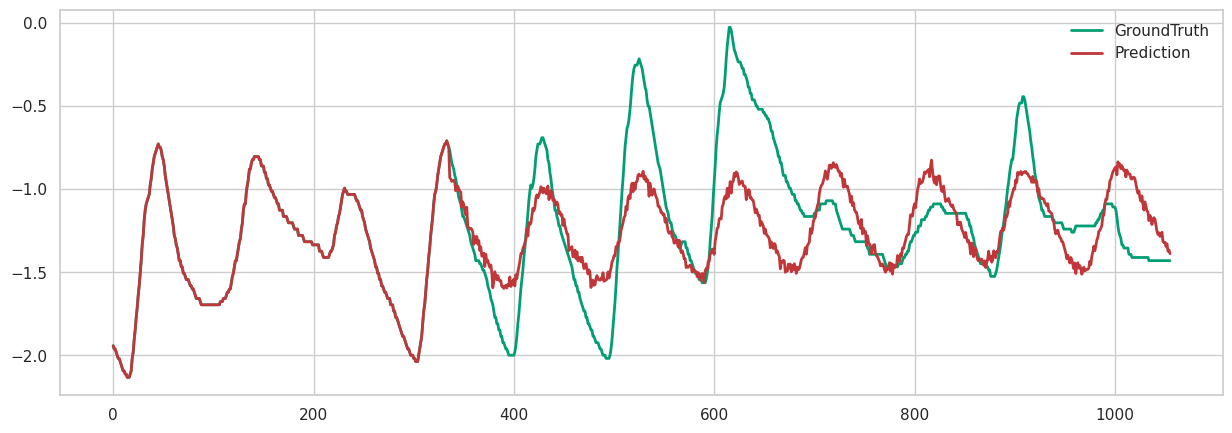

In [215]:
exp.test(setting)
torch.cuda.empty_cache()

### Compare our results with paper results

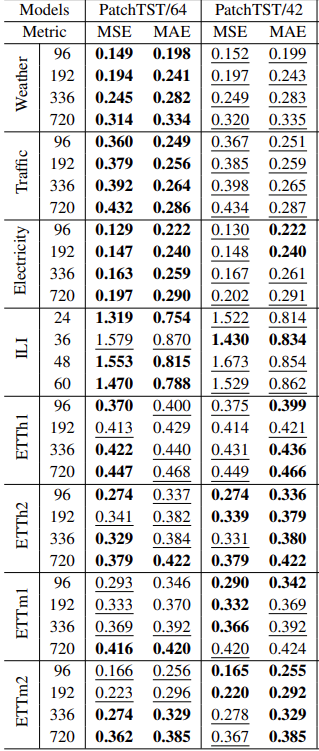

In [6]:
from IPython.display import Image
Image(filename=r"./Images/PatchTST Results.PNG")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| PatchTST/42 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTm2 | 96 |  0.1689293086528778 | 0.2611851394176483  |
|  | ETTm2 | 192 |  **0.2248840183019638** | **0.2977927625179291** |
|  | ETTm2 | 336 | **0.27793970704078674** | **0.3345499634742737**  |
|  | ETTm2 | 720 | 0.40568575263023376 | 0.4156728684902191 |


| PatchTST/64 | Dataset | Seq_len | MSE | MAE |
|---|---|---|---|---|
|  | ETTm2 | 96 |  **0.1681060492992401** | **0.25864073634147644**  |
|  | ETTm2 | 192 |  0.23120321333408356 | 0.3041490614414215 |
|  | ETTm2 | 336 | 0.28607428073883057 | 0.33890119194984436  |
|  | ETTm2 | 720 | **0.3954890966415405** | **0.40658628940582275** |


---
### Conclusion
---

The training process is progressing well and the `PatchTST` model is being optimized in an effective manner. 
- The loss is steadily decreasing over the epochs, which indicates the model is learning and improving. 
- The validation loss is also decreasing at each epoch, showing the model is generalizing well.

**The key positive signs I see are:**

- Decreasing loss and validation loss
- Learning rate decay schedule


---

In [ ]:
!zip PatchTST_test_results.zip /kaggle/working/Transformer-based-solutions-for-the-long-term-time-series-forecasting/test_results/*/*

In [ ]:
!zip PatchTST_results.zip /kaggle/working/Transformer-based-solutions-for-the-long-term-time-series-forecasting/results/*/*